# College Basketball/NBA Performance Analysis for Rookies

##### In this project I look at two datasets, one of which can be found on this website: https://www.kaggle.com/datasets/adityak2003/college-basketball-players-20092021 and the other https://www.basketball-reference.com/leagues/NBA_2010_rookies-season-stats.html (which I used pandas built in scraping features to aquire). This project involves a linear regression model to predict the performance of players that enter the NBA.

## Loading Data and Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import missingno as mno
import urllib.request

In [2]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [3]:
missingLink = 'https://www.basketball-reference.com/leagues/NBA_{}_rookies-season-stats.html'
df = pd.DataFrame()
class AppURLopener(urllib.request.FancyURLopener):
    version = "Mozilla/5.0"
for i in years:
    url = missingLink.format(i)
    opener = AppURLopener()
    response = opener.open(url)
    df2 = pd.read_html(response, header = 0)
    df = df.append(df2)       

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: AppURLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  import sys


In [4]:
df = df.drop(df[df.Totals == 'G'].index)
df = df.drop(df[df.Totals == 'Totals'].index)

In [5]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Totals.1,Totals.2,Totals.3,Totals.4,...,Totals.13,Totals.14,Totals.15,Shooting,Shooting.1,Shooting.2,Per Game,Per Game.1,Per Game.2,Per Game.3
1,1,David Andersen,"Oct 27, '09, HOU @ POR",29,1,63,891,147,340,27,...,37,119,367,.432,.346,.687,14.1,5.8,3.3,0.7
2,2,Antonio Anderson,"Mar 3, '10, OKC @ DEN",24,1,1,15,1,3,0,...,1,1,2,.333,NaN,NaN,15.0,2.0,1.0,0.0
3,3,Jeff Ayres,"Dec 22, '09, POR @ DAL",22,1,39,405,43,65,0,...,12,76,104,.662,NaN,.900,10.4,2.7,2.5,0.0
4,4,Rodrigue Beaubois,"Oct 30, '09, DAL @ LAL",21,1,56,700,155,299,45,...,54,84,397,.518,.409,.808,12.5,7.1,1.4,1.3
5,5,DeJuan Blair,"Oct 28, '09, SAS vs. NOH",20,1,82,1494,275,495,0,...,112,224,638,.556,.000,.547,18.2,7.8,6.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,122,Ziaire Williams,"Oct 20, '21, MEM vs. CLE",20,1,62,1346,191,424,76,...,41,113,501,.450,.314,.782,21.7,8.1,2.1,1.0
135,123,McKinley Wright IV,"Oct 20, '21, MIN vs. HOU",23,1,5,19,2,3,1,...,1,1,5,.667,.500,NaN,3.8,1.0,0.0,0.6
136,124,Moses Wright,"Dec 22, '21, LAC @ SAC",23,1,4,14,1,4,0,...,0,0,5,.250,.000,1.000,3.5,1.3,0.8,0.5
137,125,Gabe York,"Apr 9, '22, IND @ PHI",28,1,2,21,2,7,1,...,1,4,8,.286,.167,.600,10.5,4.0,1.0,2.0


In [6]:
df.to_csv('/Users/vishva/Rookie_Performance.csv')

In [7]:
df1 = pd.read_csv('/Users/vishva/CollegeBasketballPlayers2009-2021.csv')
df2 = pd.read_csv("/Users/vishva/Rookie_Performance.csv")
pd.set_option('display.max_columns', None)

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Both of the datasets are now stored into df1 and df2. df1 refers to the college basketball data aquired from the Kaggle dataset while df2 was scraped off of the website mentioned in the first cell.

## Exploratory Data Analysis (and preliminary data cleaning):

### College Performance EDA:

In [8]:
df1.head()

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [9]:
df2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Totals,Totals.1,Totals.2,Totals.3,Totals.4,Totals.5,Totals.6,Totals.7,Totals.8,Totals.9,Totals.10,Totals.11,Totals.12,Totals.13,Totals.14,Totals.15,Shooting,Shooting.1,Shooting.2,Per Game,Per Game.1,Per Game.2,Per Game.3
0,1,1,David Andersen,"Oct 27, '09, HOU @ POR",29,1,63,891,147,340,27,78,46,67,54,208,44,15,12,37,119,367,0.432,0.346,0.687,14.1,5.8,3.3,0.7
1,2,2,Antonio Anderson,"Mar 3, '10, OKC @ DEN",24,1,1,15,1,3,0,0,0,0,1,1,0,0,0,1,1,2,0.333,NaN,NaN,15.0,2.0,1.0,0.0
2,3,3,Jeff Ayres,"Dec 22, '09, POR @ DAL",22,1,39,405,43,65,0,0,18,20,25,98,1,7,16,12,76,104,0.662,NaN,0.900,10.4,2.7,2.5,0.0
3,4,4,Rodrigue Beaubois,"Oct 30, '09, DAL @ LAL",21,1,56,700,155,299,45,110,42,52,12,78,74,29,12,54,84,397,0.518,0.409,0.808,12.5,7.1,1.4,1.3
4,5,5,DeJuan Blair,"Oct 28, '09, SAS vs. NOH",20,1,82,1494,275,495,0,2,88,161,200,526,65,50,39,112,224,638,0.556,0.000,0.547,18.2,7.8,6.4,0.8


In [10]:
df1.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

In [11]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Totals', 'Totals.1', 'Totals.2', 'Totals.3', 'Totals.4',
       'Totals.5', 'Totals.6', 'Totals.7', 'Totals.8', 'Totals.9', 'Totals.10',
       'Totals.11', 'Totals.12', 'Totals.13', 'Totals.14', 'Totals.15',
       'Shooting', 'Shooting.1', 'Shooting.2', 'Per Game', 'Per Game.1',
       'Per Game.2', 'Per Game.3'],
      dtype='object')

These columns are largely unintelligble as the abbreviation and titles are not useful. By researching the meaning of each of the statistic names, I have obtained some more meaningful titles for the columns:

In [12]:
nameChange = {"player_name" : "Player Name", "team" : "Team", 
"conf" : "Conference", "GP" :"Games Played", 
"Min_per" : "Minutes Played Per Game", "Ortg" : "Offensive Rating", 
"usg" : "Usage Percentage", "eFG" : "Effective Field Gold Percentage", 
"TS_per" : "True Shot percentage", 
"ORB_per" : "Offensive Rebound Percentage", 
"DRB_per" : "Defensive Rebound Percentage", "AST_per" : "Assist Percentage", 
"TO_per" : "Turnover Percentage" , "FTM" : "Free Throws made", "FTA" : "Free Throws Attempted", 
"FT_per" : "Free Throw Percentage", "twoPM" : "Two Point Shots Made", "twoPA" : "Two Point Shots Attempted",
"twoP_per" : "Two Shot Point Percentage", "TPM" : "Three Points Made", "TPA" : "Three Points Attempted", 
"TP_per" : "Three Point Percentage", "blk_per" : "Block Percentage", "stl_per" : "Steal Percentage", 
"ftr" : "Free Throw Rate", "yr" : "College Year", "ht" : "ht", "num" : "Em", "porpag" : "Points Over Replacement Per Adjusted Game", 
"adjoe" : "Adjusted Offensive Efficiency","pfr":"pfr", "year" : "Year", "pid" : "Emp", "type" :"Empt", 
"Rec Rank" : "Recruit Rank", "ast/tov" : "Assist to Turnover Ratio", "rimmade" : "Rimshots Made", "rimmade+rimmiss" : "Rim Shots Attempted", 
"midmade" : "Midrange Shots Made", "midmade+midmiss" : "Total Midrange Shots Attempted", "rimmade/(rimmade+rimmiss)" : "Rim Shot Percentage",
"midmade/(midmade+midmiss)" : "Midrange Shot Percentage", "dunksmade" : "Dunks Made", "dunksmiss+dunksmade" : "Total Number of Dunks Attempted",
"dunksmade/(dunksmade+dunksmiss)" : "Dunk Percentage", "pick" : "Draft Pick", "drtg" : "Defensive Rating", "adrtg" : "Adjusted Defensive Rating",
"dporpag" : "Defensive Points over replacement per adjusted game", "Stop" : "Stops", "bpm" : "Box Plus/Minus",
"obpm" : "Offensive Box Plus/Minus", "dbpm" : "Defensive Box Plus/Minus", "gbpm" : "Game Box Plus/Minus", 
"mp" : "Minutes Played", "ogbpm" : "Offensive gbpm", "dgbpm" : "Defensive gpbm", "oreb" : "Offensive Rebounds", 
"dreb" : "Defensive Rebounds", "treb" : "Total Rebounds", "ast" : "Assists", "stl" : "Steals", "blk" : "Blocks",
"pts" : "Points", "Unnamed: 64" : "Positions", "Unnamed: 65" : "65"}


In [13]:
df1.rename(columns = nameChange, inplace = True)

In [14]:
df1.head()

,Player Name,Team,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,College Year,ht,Em,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,pfr,Year,Emp,Empt,Recruit Rank,Assist to Turnover Ratio,Rimshots Made,Rim Shots Attempted,Midrange Shots Made,Total Midrange Shots Attempted,Rim Shot Percentage,Midrange Shot Percentage,Dunks Made,Total Number of Dunks Attempted,Dunk Percentage,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points,Positions,65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,2,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,3,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,5,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,8,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,9,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [15]:
df1.describe()

,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,pfr,Year,Emp,Recruit Rank,Assist to Turnover Ratio,Rimshots Made,Rim Shots Attempted,Midrange Shots Made,Total Midrange Shots Attempted,Rim Shot Percentage,Midrange Shot Percentage,Dunks Made,Total Number of Dunks Attempted,Dunk Percentage,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points,65
count,61061.000000,61061.00000,61061.000000,61061.000000,61061.000000,61061.000000,61061.00000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,61061.000000,18470.000000,56334.000000,54732.000000,54732.000000,54732.000000,54732.000000,50951.000000,50676.000000,54732.000000,54732.000000,27551.000000,1435.000000,61016.000000,61016.000000,61016.000000,61016.000000,61016.000000,61016.000000,61016.000000,61016.000000,61023.000000,61016.000000,61016.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61023.000000,61016.000000
mean,22.797760,37.12839,91.666396,18.126341,44.500768,47.584212,5.54225,12.704242,10.808699,20.225856,31.911924,45.659504,0.577909,40.366224,83.046232,0.426696,15.343984,44.691587,0.227514,1.866607,1.714820,37.021829,0.772884,89.137664,4.219679,2015.062642,33574.478931,53.555636,0.936601,27.380034,45.926569,14.100782,39.301122,0.563493,0.325114,3.740243,4.206789,0.862956,33.163763,103.268716,103.418621,1.436596,80.830959,-2.539234,-1.903617,-0.635617,-2.537862,16.940380,-2.088743,-0.449119,0.764618,1.897561,2.662179,1.072777,0.529446,0.280996,5.773579,5.384933
std,10.166805,28.05805,30.963736,6.253742,18.431761,17.640613,9.30561,10.755123,9.362704,12.318765,36.160570,48.629974,0.271861,43.060863,83.829667,0.195703,21.193958,57.039649,0.190639,5.703945,2.134472,36.662901,1.333199,31.339883,4.509730,3.750077,20404.710236,27.559184,0.700019,29.654274,46.830499,17.236696,43.609491,0.191918,0.174043,7.787782,8.542236,0.230920,16.658405,10.076153,10.957062,1.064943,64.617080,7.585037,5.204791,4.252762,8.383170,10.618357,6.237674,3.336297,0.734824,1.483689,2.097767,1.169677,0.469614,0.414885,4.947872,5.581653
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2009.000000,2.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,9.30000,83.900000,14.500000,40.000000,43.800000,1.80000,8.400000,4.600000,14.700000,4.000000,6.000000,0.500000,5.000000,12.000000,0.374000,0.000000,1.000000,0.000000,0.000000,0.900000,19.000000,-0.175160,79.238400,2.700000,2012.000000,17054.000000,30.800000,0.461555,4.000000,8.000000,1.000000,6.000000,0.500000,0.250000,0.000000,0.000000,0.818200,19.000000,98.969850,98.013000,0.521478,18.657750,-5.395683,-3.990737,-2.290848,-5.405100,7.266700,

Upon looking at this data, there is a portion of the data contains players that had little to no impact on their team. In other words, there is a high number of zeroes in various categories. This is to be expected as every player cannot be expected to have the same playtime as others. 

In [16]:
df1.dtypes

Player Name                 object
Team                        object
Conference                  object
Games Played                 int64
Minutes Played Per Game    float64
                            ...   
Steals                     float64
Blocks                     float64
Points                     float64
Positions                   object
65                         float64
Length: 66, dtype: object

Since the "int64" and "float64" are our only instances of numerical data, they can be stored in an list for the visualizations (which I will make later). On the other hand, all object variables can be stored in a different list for the categorical visualizations.

In [17]:
numerics = ['int64','float64']
df1Numerics = df1.select_dtypes(include = numerics)
df1Numerics.columns

Index(['Games Played', 'Minutes Played Per Game', 'Offensive Rating',
       'Usage Percentage', 'Effective Field Gold Percentage',
       'True Shot percentage', 'Offensive Rebound Percentage',
       'Defensive Rebound Percentage', 'Assist Percentage',
       'Turnover Percentage', 'Free Throws made', 'Free Throws Attempted',
       'Free Throw Percentage', 'Two Point Shots Made',
       'Two Point Shots Attempted', 'Two Shot Point Percentage',
       'Three Points Made', 'Three Points Attempted', 'Three Point Percentage',
       'Block Percentage', 'Steal Percentage', 'Free Throw Rate',
       'Points Over Replacement Per Adjusted Game',
       'Adjusted Offensive Efficiency', 'pfr', 'Year', 'Emp', 'Recruit Rank',
       'Assist to Turnover Ratio', 'Rimshots Made', 'Rim Shots Attempted',
       'Midrange Shots Made', 'Total Midrange Shots Attempted',
       'Rim Shot Percentage', 'Midrange Shot Percentage', 'Dunks Made',
       'Total Number of Dunks Attempted', 'Dunk Percentage', '

In [18]:
categoricals = ['object']
df1Categoricals = df1.select_dtypes(include = categoricals)
df1Categoricals.columns

Index(['Player Name', 'Team', 'Conference', 'College Year', 'ht', 'Em', 'Empt',
       'Positions'],
      dtype='object')

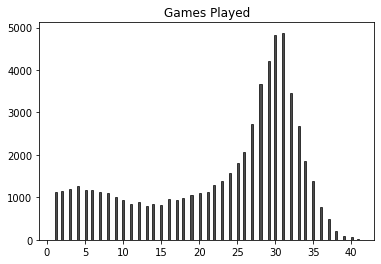

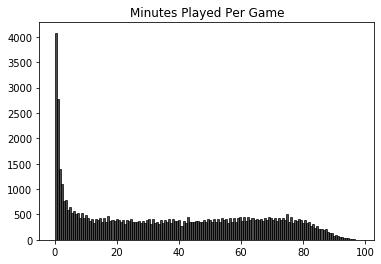

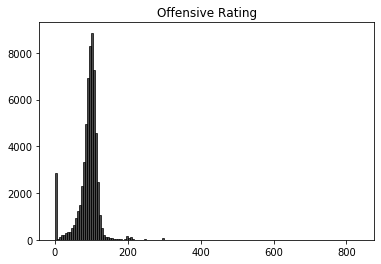

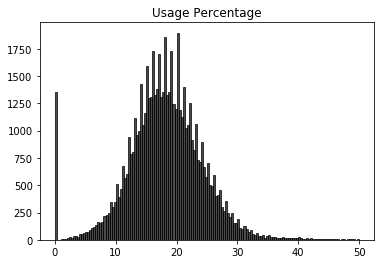

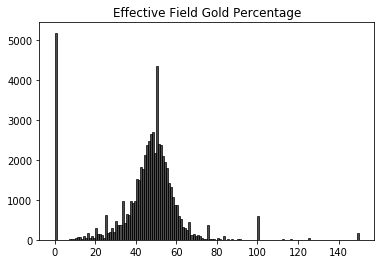

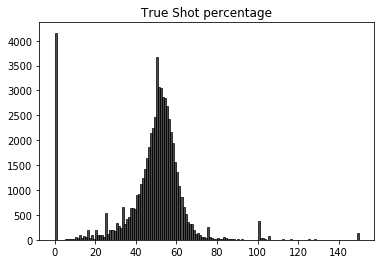

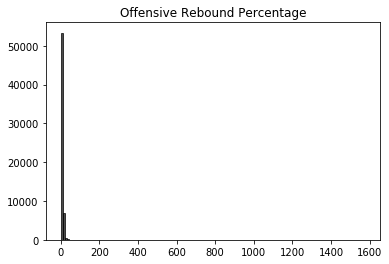

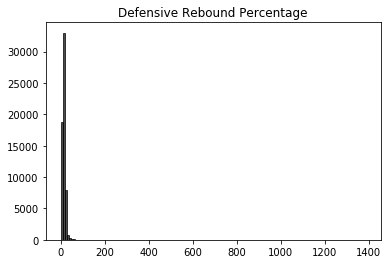

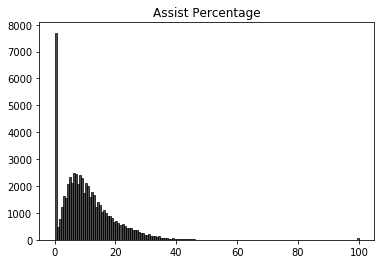

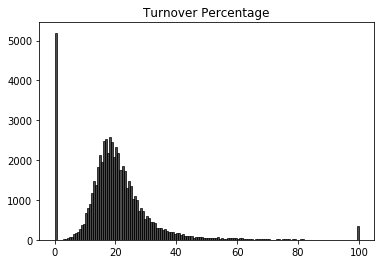

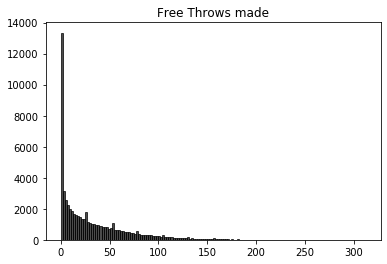

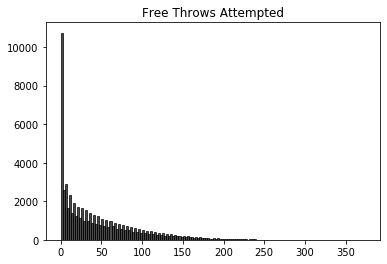

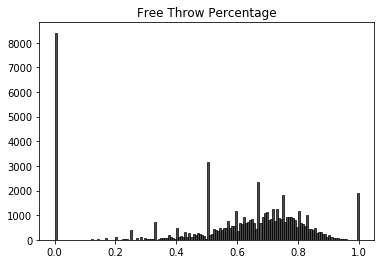

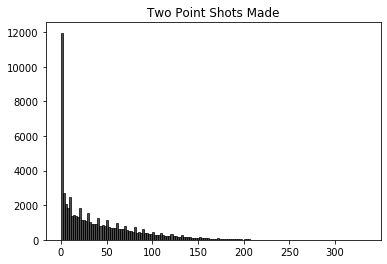

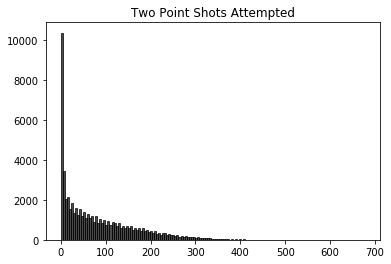

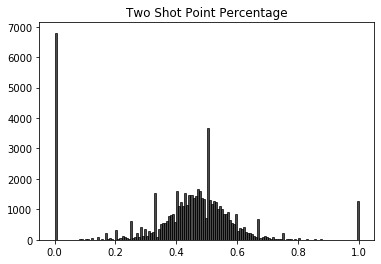

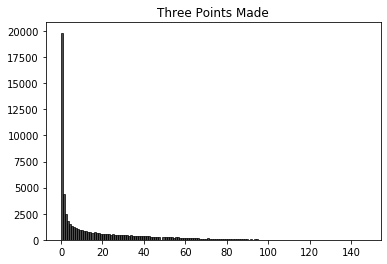

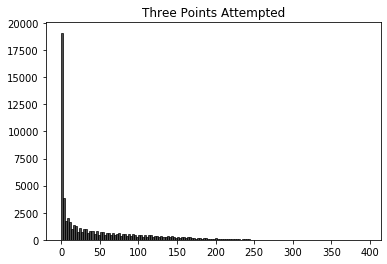

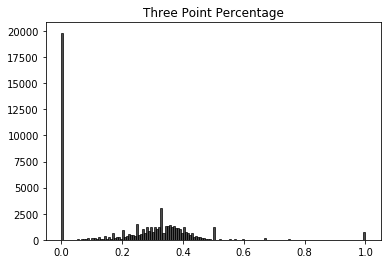

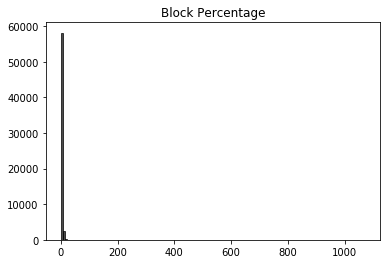

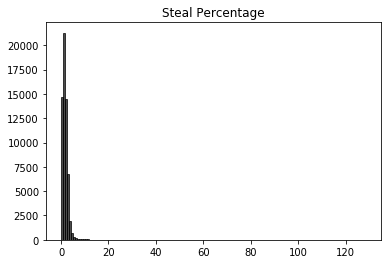

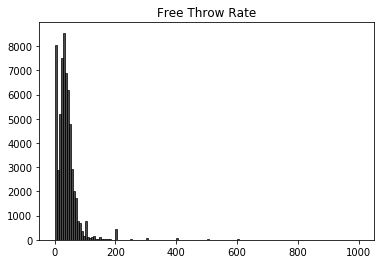

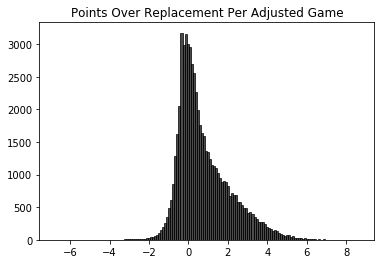

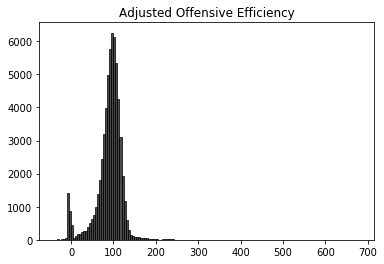

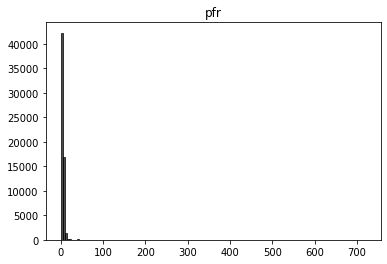

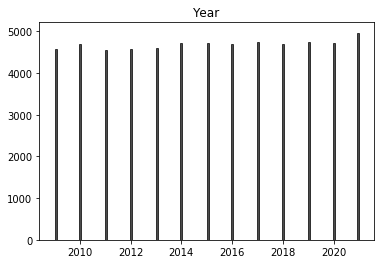

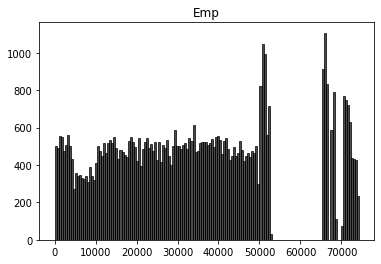

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


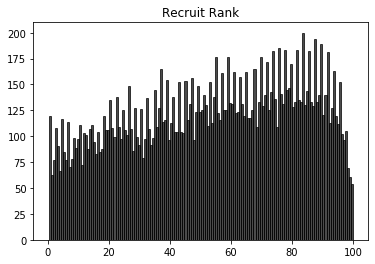

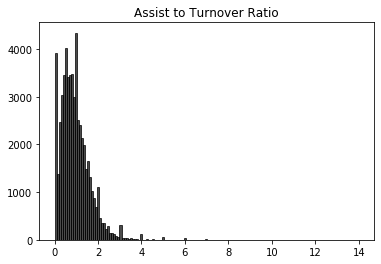

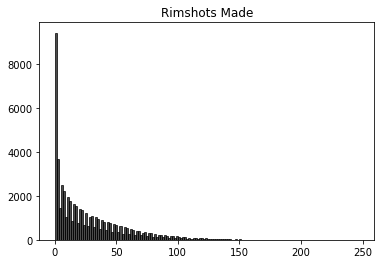

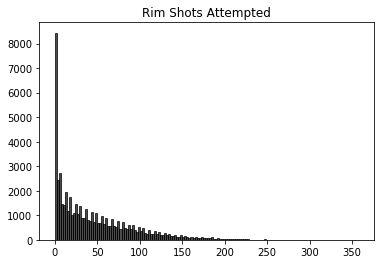

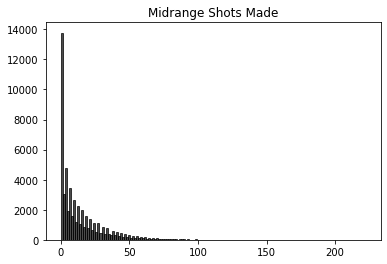

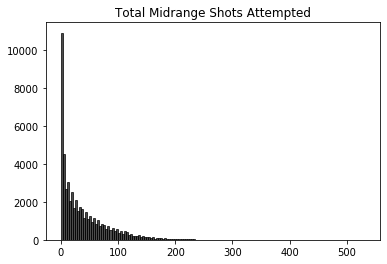

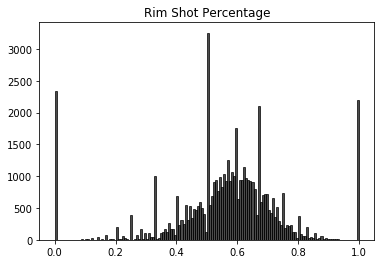

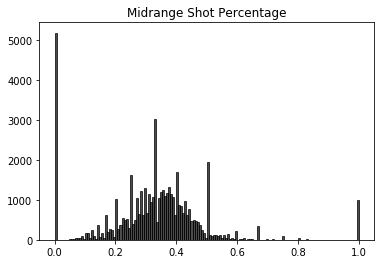

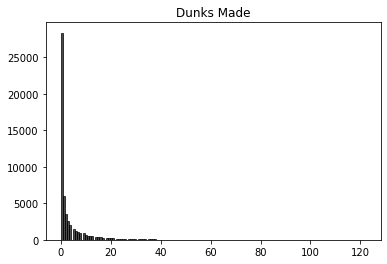

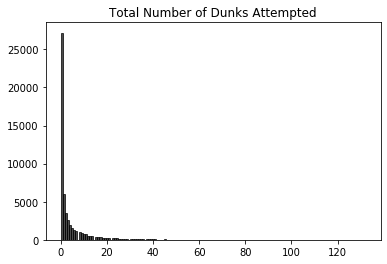

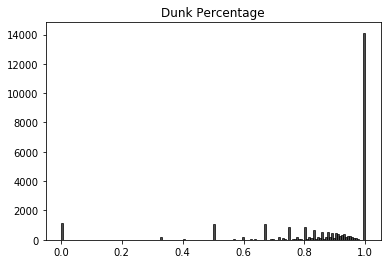

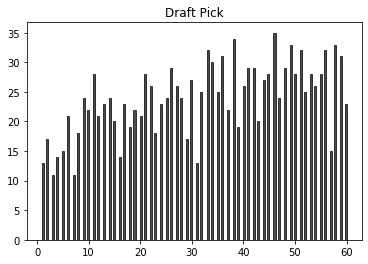

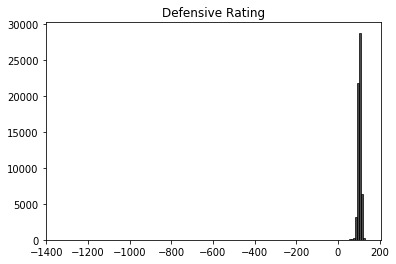

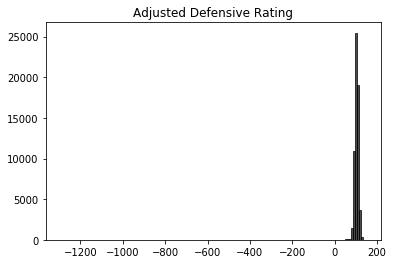

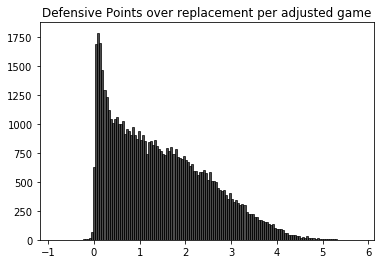

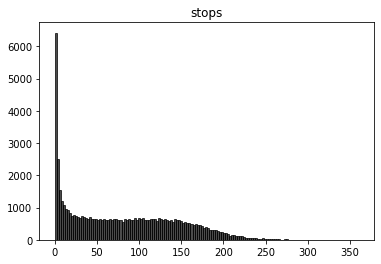

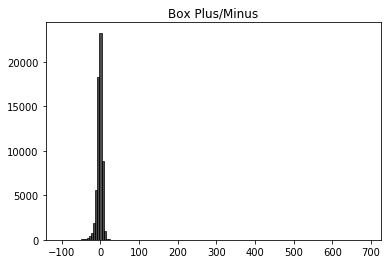

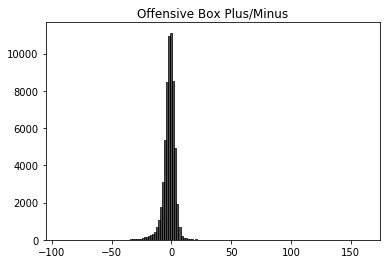

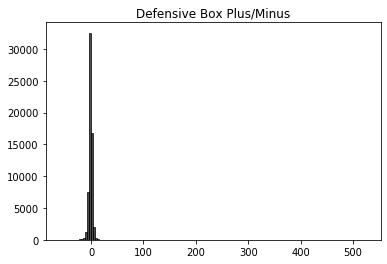

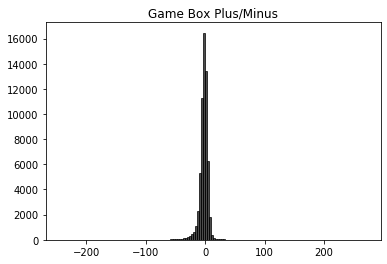

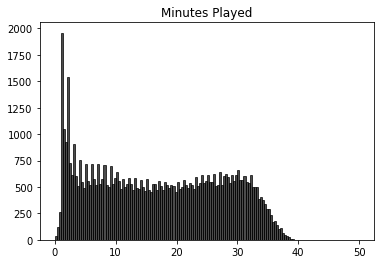

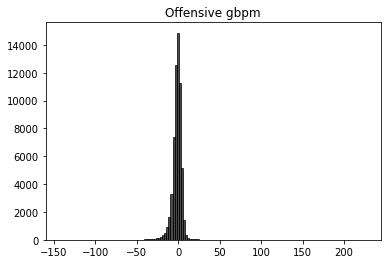

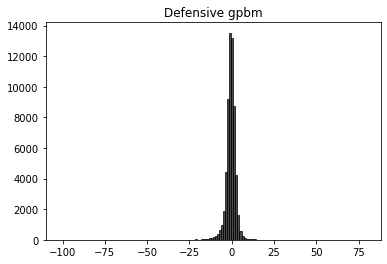

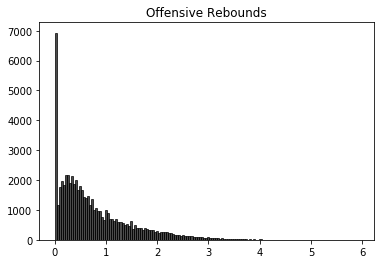

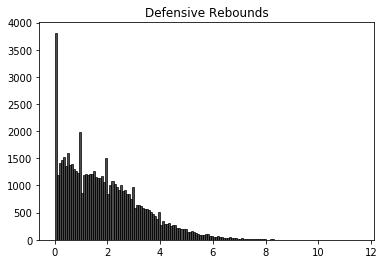

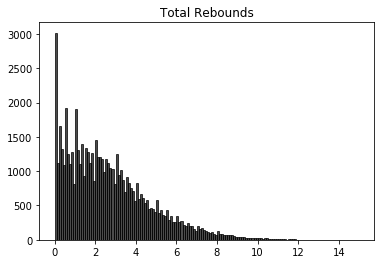

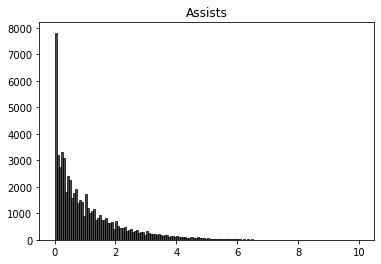

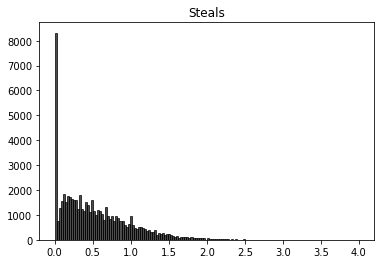

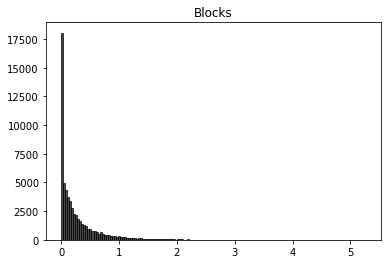

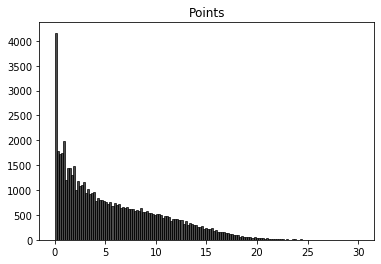

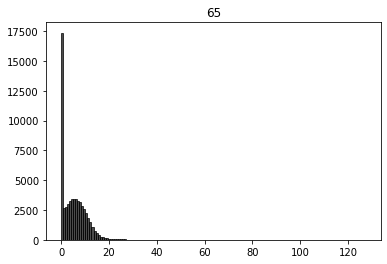

In [19]:
for i in df1Numerics.columns:
    plt.hist(df1[i], bins=150, facecolor='black', edgecolor='black', linewidth=1, alpha=0.7)
    plt.title(i)
    plt.show()

These graphs confirms my suspicious that there is a sizeable portion of low performing players. This is to be expected because only the top 5 players on a team are allowed on a court at a time. In other words, these players may actually have the potential to become great players in the NBA, but there just is not enough data on their abilities. This information would be useful to improve our Linear Regression model.

Text(0.5, 1.0, 'Conference')

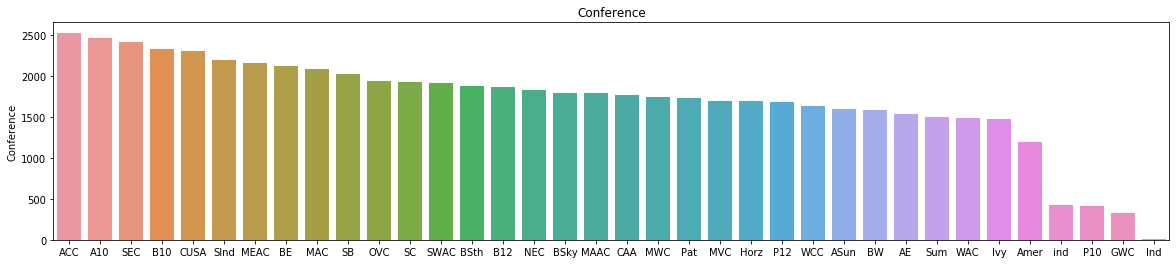

In [20]:
plt.figure(figsize = (20,4))
sns.barplot(df1['Conference'].value_counts().index,df1
            ['Conference'].value_counts()).set_title('Conference')


The information regarding the conference is valuable as certain divisions of College Basketball may be more/less competitive than others. This may lend itself to distinct scoring distributions. For instance, if a top tier player is to enter the B12 they may not perform as well as if they were to be placed in a less competitive bracket.

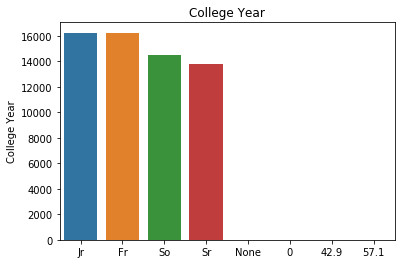

In [21]:
plot = sns.barplot(df1['College Year'].value_counts().index,df1
            ['College Year'].value_counts()).set_title('College Year')


This data regarding the College Years is largely unhelpful and can be dropped as it will not directly effect any major variables after I average the performances of athletes across all their years of play.

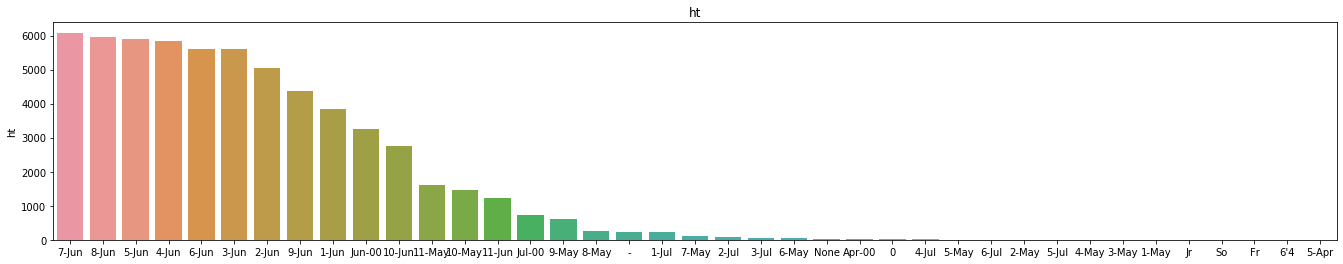

In [22]:
plt.figure(figsize = (23,4))
plot = sns.barplot(df1['ht'].value_counts().index,df1
            ['ht'].value_counts()).set_title('ht')


I was unnable to find information on this data point and it seems that it only really provides some dates. As a reuslt, I chose to drop this column in my analysis. I think that this may relate to the date that players played their last game or something of the sorts as the majority of data is concentrated in a small set of dates. As it does not seem to be directly correlated with other variables, it seems like a safe option to drop this column.

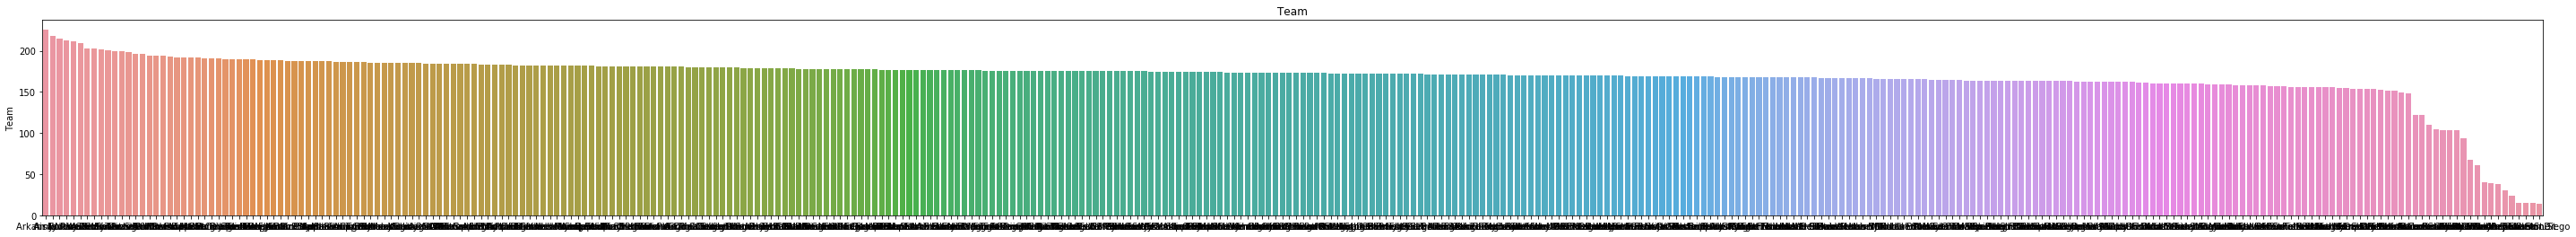

In [23]:
plt.figure(figsize = (50,4))
plot = sns.barplot(df1['Team'].value_counts().index,df1
            ['Team'].value_counts()).set_title('Team')


Though the graph is pretty unreadable, it does provide to us the notion that all teams have relatively the same distribution of players and that there are indeed a LOT of teams in this data set.

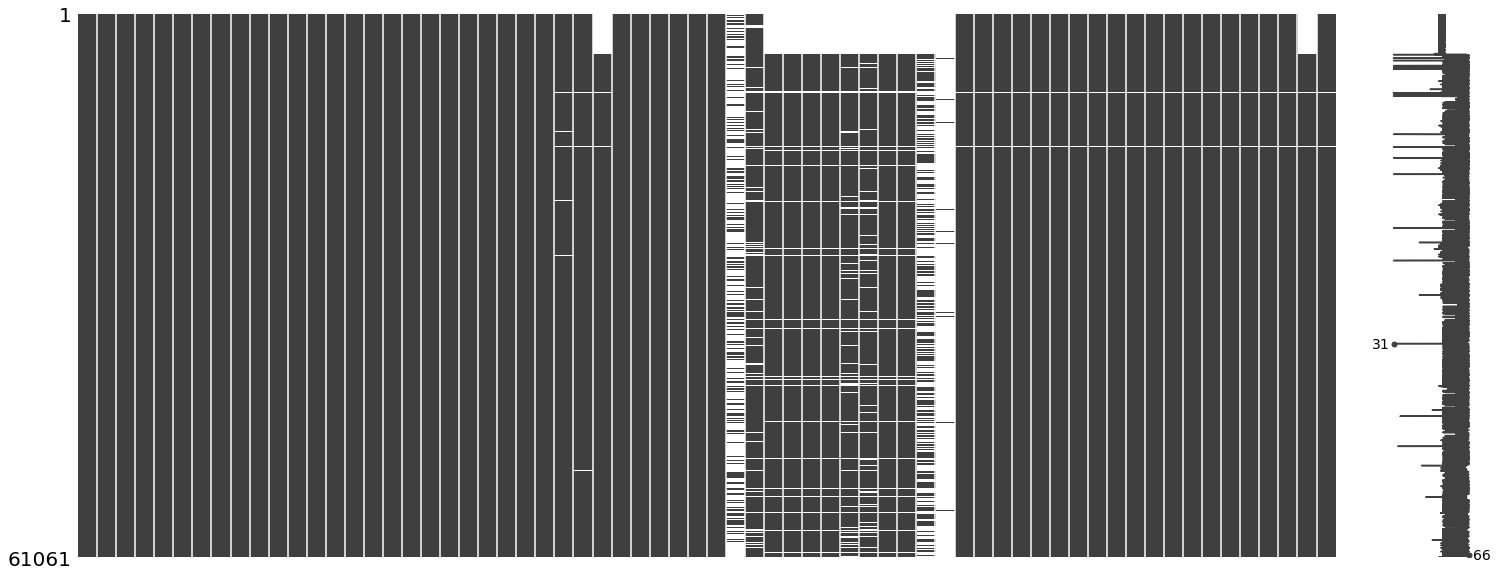

In [24]:
mno.matrix(df1)

This provides some visual representation of the missing data. The first thing that we can nottice is a large section of white towards the middle/top of the dataset. This indicates that there is a lot of missing data in a single year's worth of data (2009). This is likely because certain stats were not tracked for these individuals. As a result, we should choose to drop these columns as we cannot reliably impute this data. After all, who would have been able to predict the midrange shot percentage of a player like Stephen Curry in 2009?

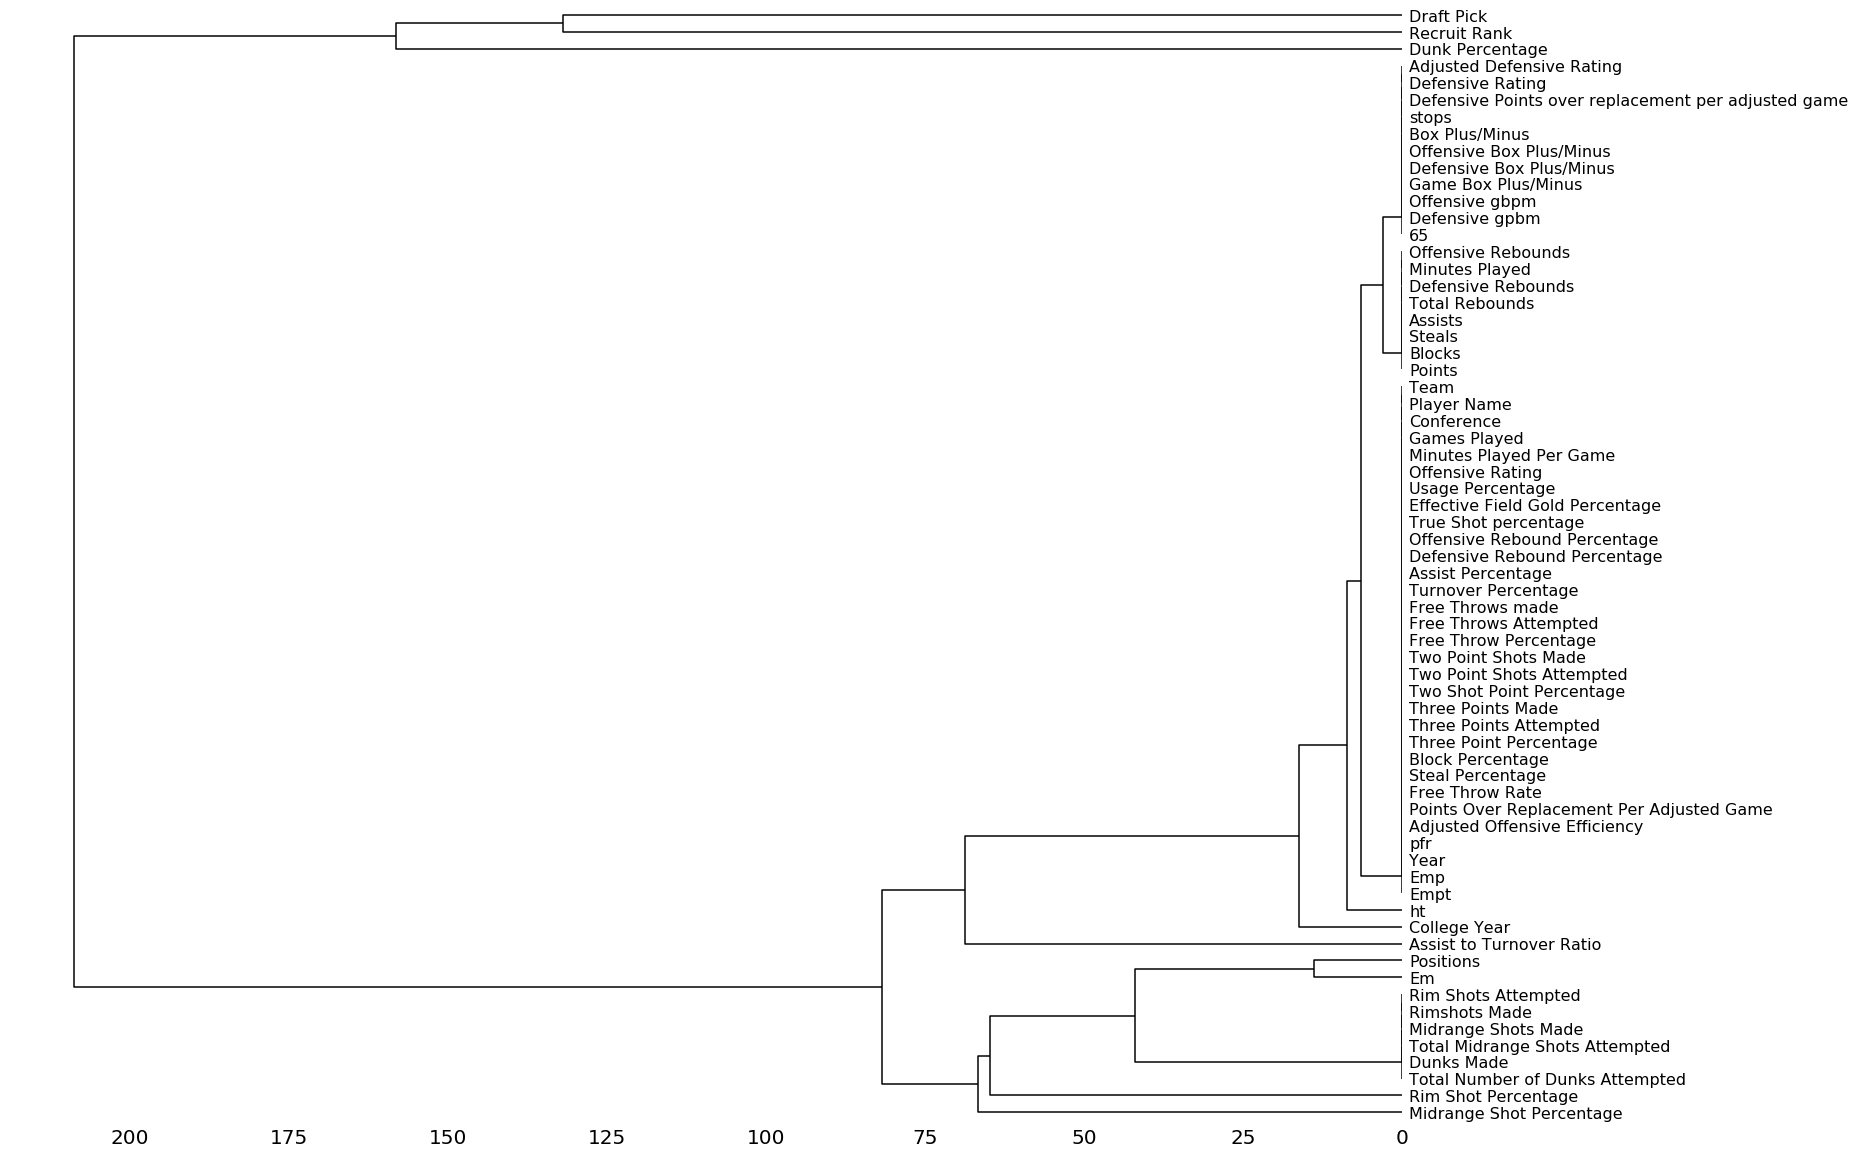

In [25]:
mno.dendrogram(df1)

This diagram reveas how closely some of the missing values are related. For instance, the data referring to the missing values in 2009 have branched relatively close together. Similarly, the draft pick/recruit rank, both points that have similar value towards coaches, are ranked together as they provide a similar metric of ranking players based on performance.

In [26]:
df1 = df1.drop("Emp", axis = 1)
df1 = df1.drop("Em", axis = 1)
df1 = df1.drop("Empt", axis = 1)
df1 = df1.drop("65", axis = 1)
df1 = df1.drop('Positions', axis = 1)
df1 = df1.drop("pfr", axis = 1)

# Needed to drop these columns first in order to do some of the visualizations

The data being referenced in the above set of dropped columns are simply columns that were renamed previously that had no meaning or were empty. Some of these include columns like 65 that was nearly fully empty, or Positions that would provided no meaningful value to our model considering how many spots were left open (this is understandable because during the college career of players, they may rotate between different positions based on their team's needs).

In [27]:
df1.drop(df1.index[df1['Minutes Played Per Game'] == '0'], inplace=True)

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Here, I chose to drop all rows that had players without any play time. This was because they would provide no meaningful data to the model.

In [28]:
print(df1.isnull().sum(axis = 0))

Player Name                                                0
Team                                                       0
Conference                                                 0
Games Played                                               0
Minutes Played Per Game                                    0
Offensive Rating                                           0
Usage Percentage                                           0
Effective Field Gold Percentage                            0
True Shot percentage                                       0
Offensive Rebound Percentage                               0
Defensive Rebound Percentage                               0
Assist Percentage                                          0
Turnover Percentage                                        0
Free Throws made                                           0
Free Throws Attempted                                      0
Free Throw Percentage                                      0
Two Point Shots Made    

In [29]:
df1 = df1.drop('Rimshots Made', axis = 1)
df1 = df1.drop('Rim Shots Attempted', axis = 1)
df1 = df1.drop('Midrange Shots Made', axis = 1)
df1 = df1.drop('Total Midrange Shots Attempted', axis = 1)
df1 = df1.drop('Rim Shot Percentage', axis = 1)
df1 = df1.drop('Midrange Shot Percentage', axis = 1)
df1 = df1.drop('Dunks Made', axis = 1)
df1 = df1.drop('Total Number of Dunks Attempted', axis = 1)
df1 = df1.drop('Dunk Percentage', axis = 1)

In line with what I mentioned before, rather than trying to impute this data for an entire year's roster, I chose to drop the columns as I could not reliably use any method to obtain values to fill these columns.

In [30]:
print(df1.isnull().sum(axis = 0))

Player Name                                                0
Team                                                       0
Conference                                                 0
Games Played                                               0
Minutes Played Per Game                                    0
Offensive Rating                                           0
Usage Percentage                                           0
Effective Field Gold Percentage                            0
True Shot percentage                                       0
Offensive Rebound Percentage                               0
Defensive Rebound Percentage                               0
Assist Percentage                                          0
Turnover Percentage                                        0
Free Throws made                                           0
Free Throws Attempted                                      0
Free Throw Percentage                                      0
Two Point Shots Made    

Even after dealing with those columns, there still exists a major issue with missing values that we will deal with alter on in this project.

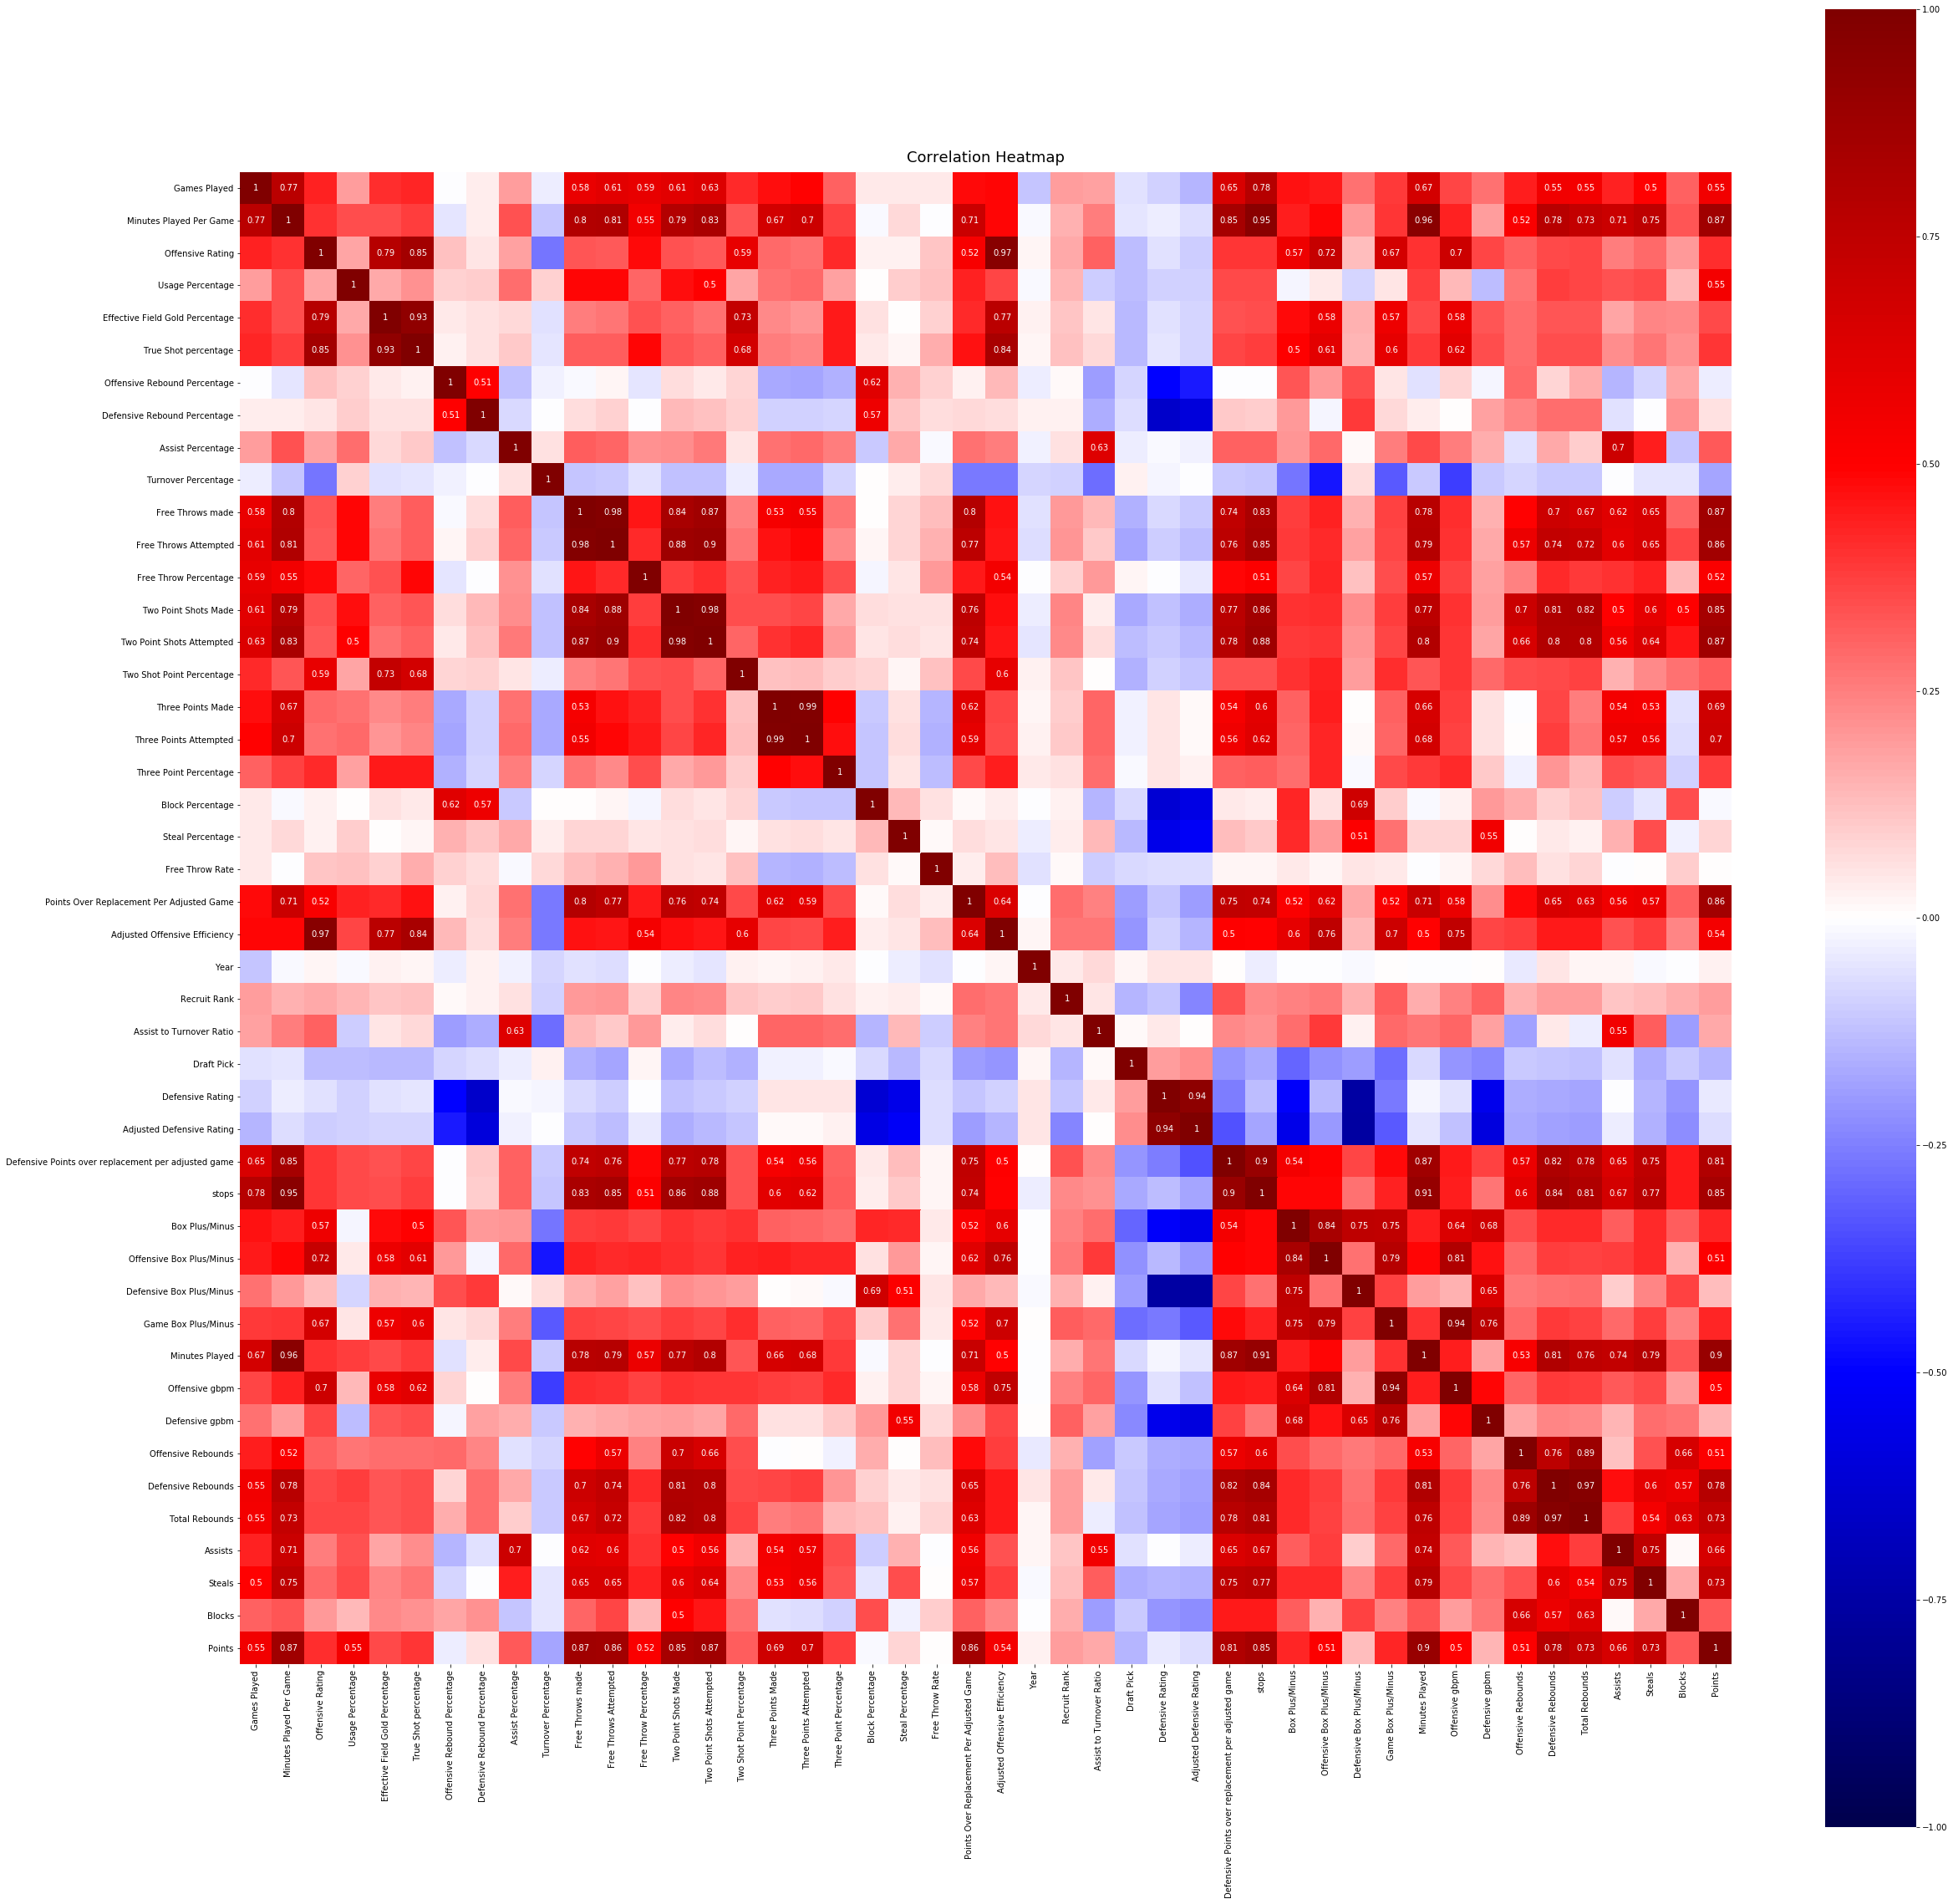

In [31]:
fig, ax = plt.subplots(figsize=(40, 40))
hmap = sns.heatmap(df1.corr(), vmin = -1, vmax=1, annot = True, square=True, cmap='seismic');
for cell in ax.texts:
    if float(cell.get_text())>=0.5:
        cell.set_text(cell.get_text()) 
    else:
        cell.set_text("")
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Upon taking a quick look on this diagram, I am excited to see that much of the data is correlated. This can be helpful for our model as we are trying to create a linear fit for our data. One important insight we can derive from this heatmap is the correlation between the number of attempts for a certain play and the number of successes.

And with that, we are finished with the EDA for our first dataset. There is still one more dataset, the rookie performance, that I will look at before getting into data cleaning.

### Rookie EDA:

In [32]:
df2.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 3,Unnamed: 4,Totals,Totals.1,Totals.2,Totals.3,Totals.4,Totals.5,Totals.6,Totals.7,Totals.8,Totals.9,Totals.10,Totals.11,Totals.12,Totals.13,Totals.14,Totals.15,Shooting,Shooting.1,Shooting.2,Per Game,Per Game.1,Per Game.2,Per Game.3
count,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1149.000000,1004.000000,1028.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,51.535959,47.777397,22.348459,1.0,34.637842,602.422945,85.301370,195.707192,20.018836,60.273973,35.397260,48.761986,26.445205,100.853596,50.909247,19.175514,11.938356,34.467466,56.251712,226.018836,0.411600,0.273775,0.705291,13.447774,4.810360,2.255565,1.082106
std,32.803882,29.879451,2.234185,0.0,25.494859,662.669042,108.289212,243.046097,31.412773,88.412004,51.402587,69.250893,37.091638,123.506009,81.569535,23.857493,18.814741,45.720086,59.626343,287.898859,0.130678,0.157200,0.175515,8.090205,3.800808,1.674872,1.207367
min,1.000000,1.000000,19.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,23.000000,21.000000,1.0,11.000000,80.750000,9.000000,25.000000,0.000000,3.000000,3.000000,5.000000,2.000000,12.000000,4.000000,2.000000,1.000000,4.000000,7.000000,23.000000,0.357000,0.200000,0.623000,7.100000,2.100000,1.000000,0.300000
50%,49.000000,45.000000,22.000000,1.0,31.000000,331.000000,40.000000,99.000000,5.000000,19.000000,15.000000,22.000000,11.000000,49.000000,19.000000,9.000000,5.000000,16.000000,32.000000,105.500000,0.416000,0.304000,0.726500,12.050000,3.800000,1.900000,0.700000
75%,75.000000,69.000000,24.000000,1.0,57.000000,935.250000,122.000000,277.000000,27.250000,86.000000,44.000000,62.000000,37.250000,151.250000,63.000000,29.000000,15.000000,47.000000,92.000000,319.000000,0.469000,0.359000,0.808000,18.500000,6.300000,3.100000,1.400000
max,138.000000,126.000000,35.000000,1.0,82.000000,3167.000000,696.000000,1376.000000,187.000000,550.000000,446.000000,695.000000,270.000000,989.000000,661.000000,152.000000,161.000000,308.000000,332.000000,1845.000000,1.000000,1.000000,1.000000,43.500000,22.500000,12.100000,8.300000


In [33]:
newName = {"Unnamed: 0.1" : "Ranks", "Unnamed: 1" : "Player Name", "Unnamed: 2" : "Debut Game", "Unnamed: 3" : "Age",
"Unnamed: 4" : "Years", "Totals" : "Games Played", "Totals.1" : "Minutes Played", "Totals.2" : "Field Goals",
"Totals.3" : "Field Goals Attempted", "Totals.4" : "3 Point Field Goals", "Totals.5" : "3 Point Field Goals Attempted",
"Totals.6" : "Free Throws Made", "Totals.7" : "Free Throws Attempted", "Totals.8" : "Offensive Rebounds", 
"Totals.9" : "Total Rebounds", "Totals.10" : "Assists", "Totals.11" : "Steals", "Totals.12" : "Blocks",
"Totals.13" : "Turnovers", "Totals.14" : "Personal Fouls", "Totals.15" : "Points", "Shooting" : "Field Goal Percentage",
"Shooting.1" : "3 Point Field Goald Percentage", "Shooting.2" : "Free Throw Percentage", "Per Game" : "Minutes Played Per Game",
"Per Game.1" : "Points Per Game", "Per Game.2" : "Total Rebounds Per Game", "Per Game.3" : "Assists Per Game"}

In [34]:
df2.rename(columns = newName, inplace = True)

As I did with the first dataset, upon looking deeper into the source for the data, I was able to locate the true meaning of each of the columns and input more meaningful titles.

In [35]:
df2 = df2.drop('Years', axis = 1)
df2 = df2.drop('Unnamed: 0', axis = 1)

In [36]:
numerics = ['int64','float64']
df2Numerics = df2.select_dtypes(include = numerics)
df2Numerics.columns

Index(['Ranks', 'Age', 'Games Played', 'Minutes Played', 'Field Goals',
       'Field Goals Attempted', '3 Point Field Goals',
       '3 Point Field Goals Attempted', 'Free Throws Made',
       'Free Throws Attempted', 'Offensive Rebounds', 'Total Rebounds',
       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points',
       'Field Goal Percentage', '3 Point Field Goald Percentage',
       'Free Throw Percentage', 'Minutes Played Per Game', 'Points Per Game',
       'Total Rebounds Per Game', 'Assists Per Game'],
      dtype='object')

In [37]:
categoricals = ['object']
df2Categoricals = df2.select_dtypes(include = categoricals)
df2Categoricals.columns

Index(['Player Name', 'Debut Game'], dtype='object')

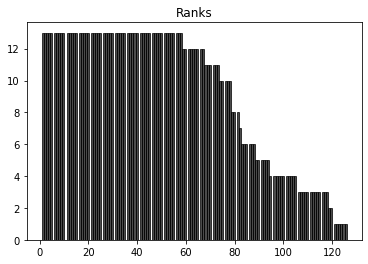

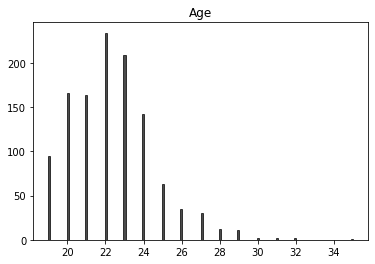

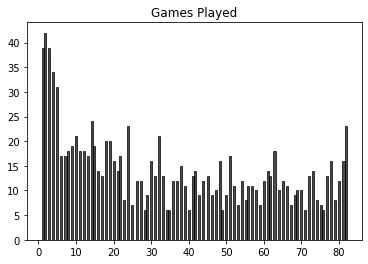

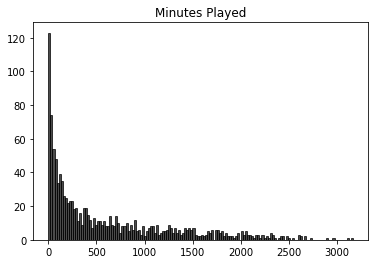

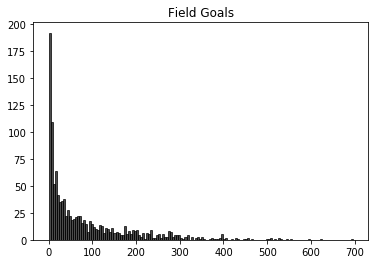

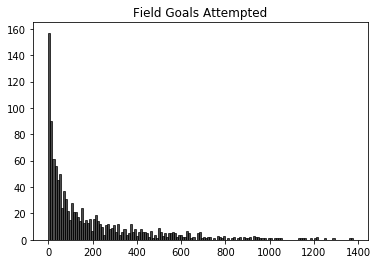

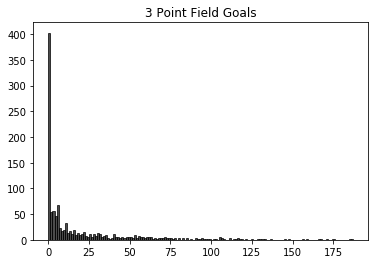

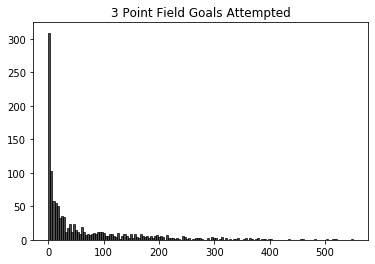

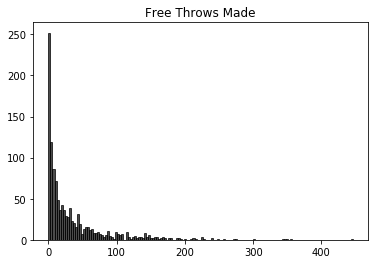

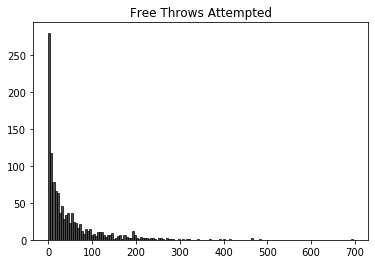

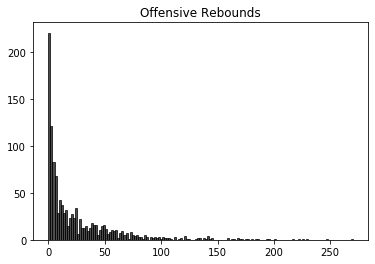

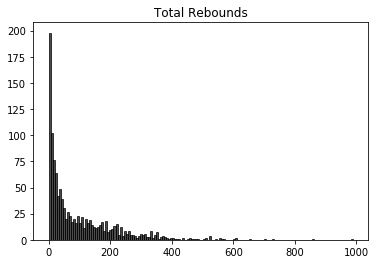

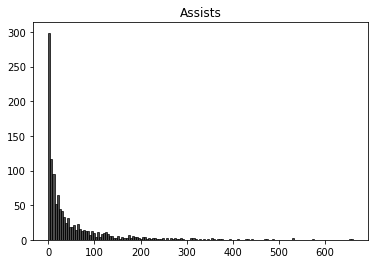

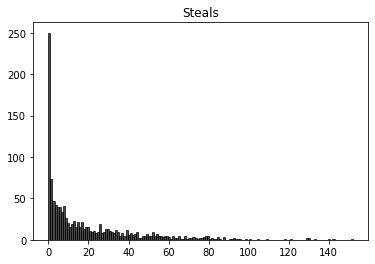

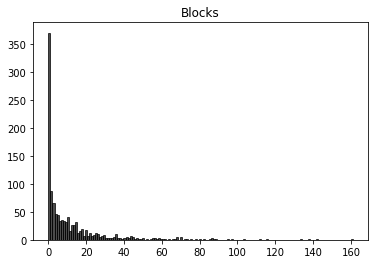

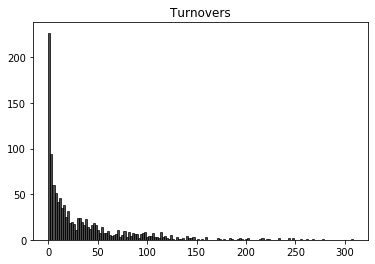

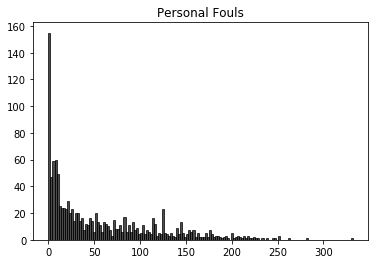

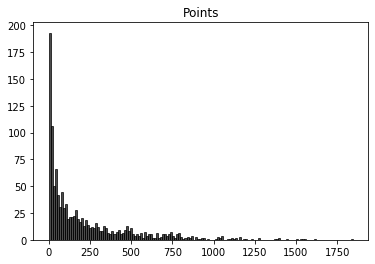

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


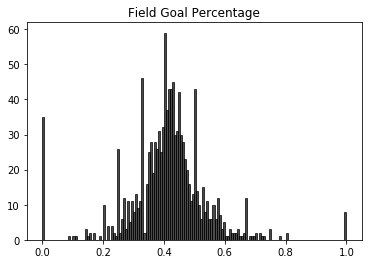

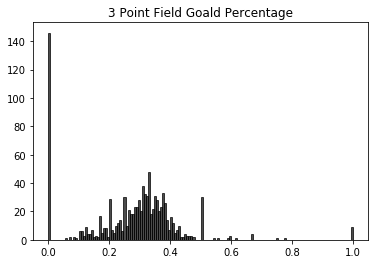

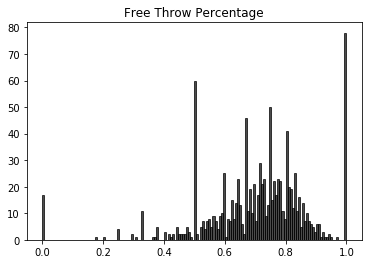

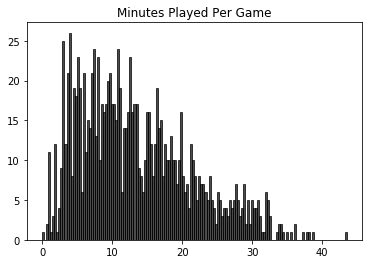

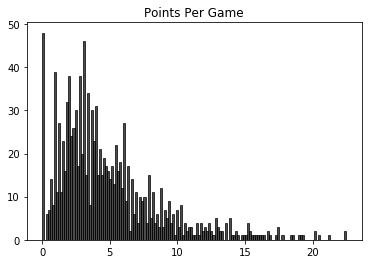

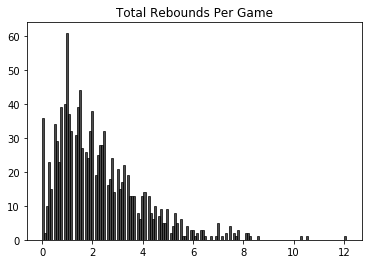

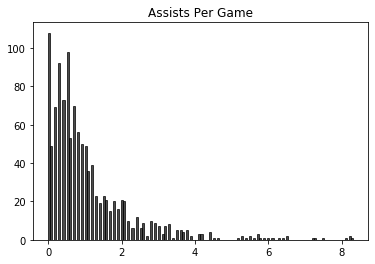

In [38]:
for i in df2Numerics.columns:
    plt.hist(df2[i], bins=150, facecolor='black', edgecolor='black', linewidth=1, alpha=0.7)
    plt.title(i)
    plt.show()

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


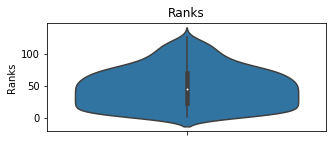

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


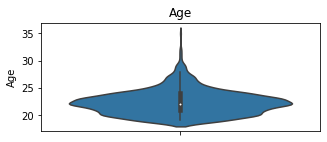

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


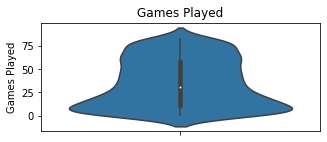

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


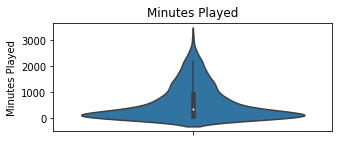

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


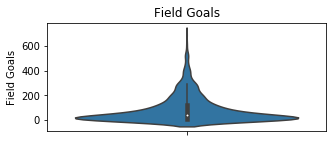

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


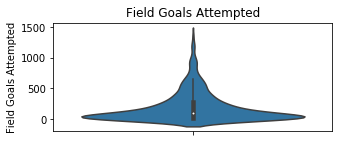

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


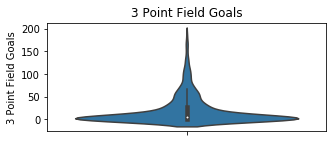

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


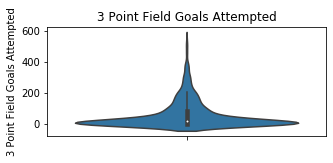

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


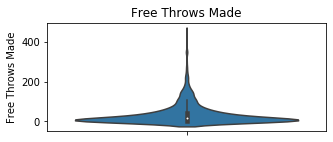

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


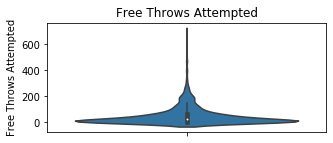

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


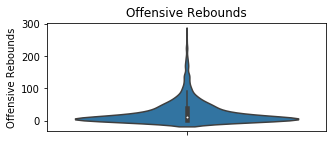

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


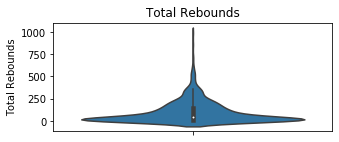

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


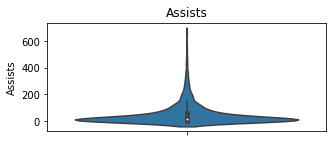

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


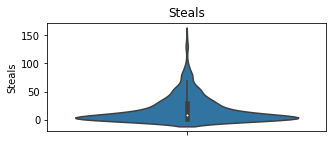

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


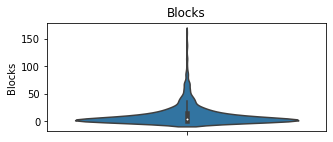

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


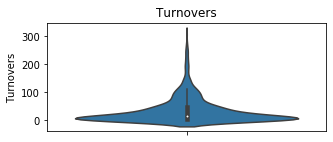

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


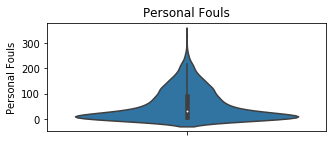

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


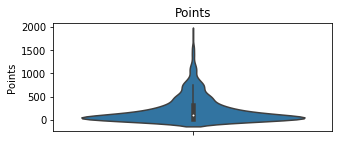

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


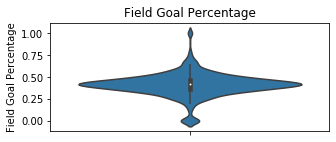

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


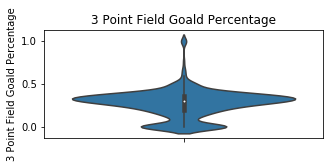

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


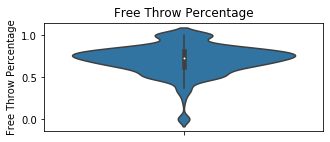

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


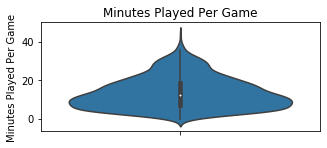

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


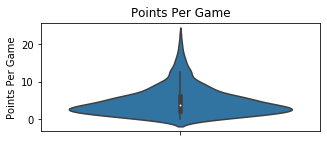

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


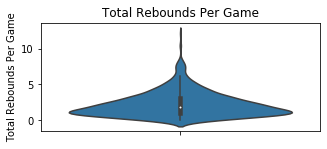

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


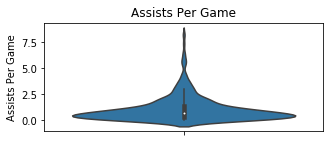

In [39]:
for i in df2Numerics.columns:
    fig, ax = plt.subplots(figsize =(5, 2))
    sns.violinplot(ax = ax,  y = df2[i])    
    plt.title(i)
    plt.show()
        

Compared with df1, df2 seems to have a much greater portion of players with "greater impact." This can be seen through the greater number of higher performing stats. This is primarily because these players that were able to make it to the NBA were already strong performers. Their success is revealed by the higher median and quartile locations for the overall distributions. 

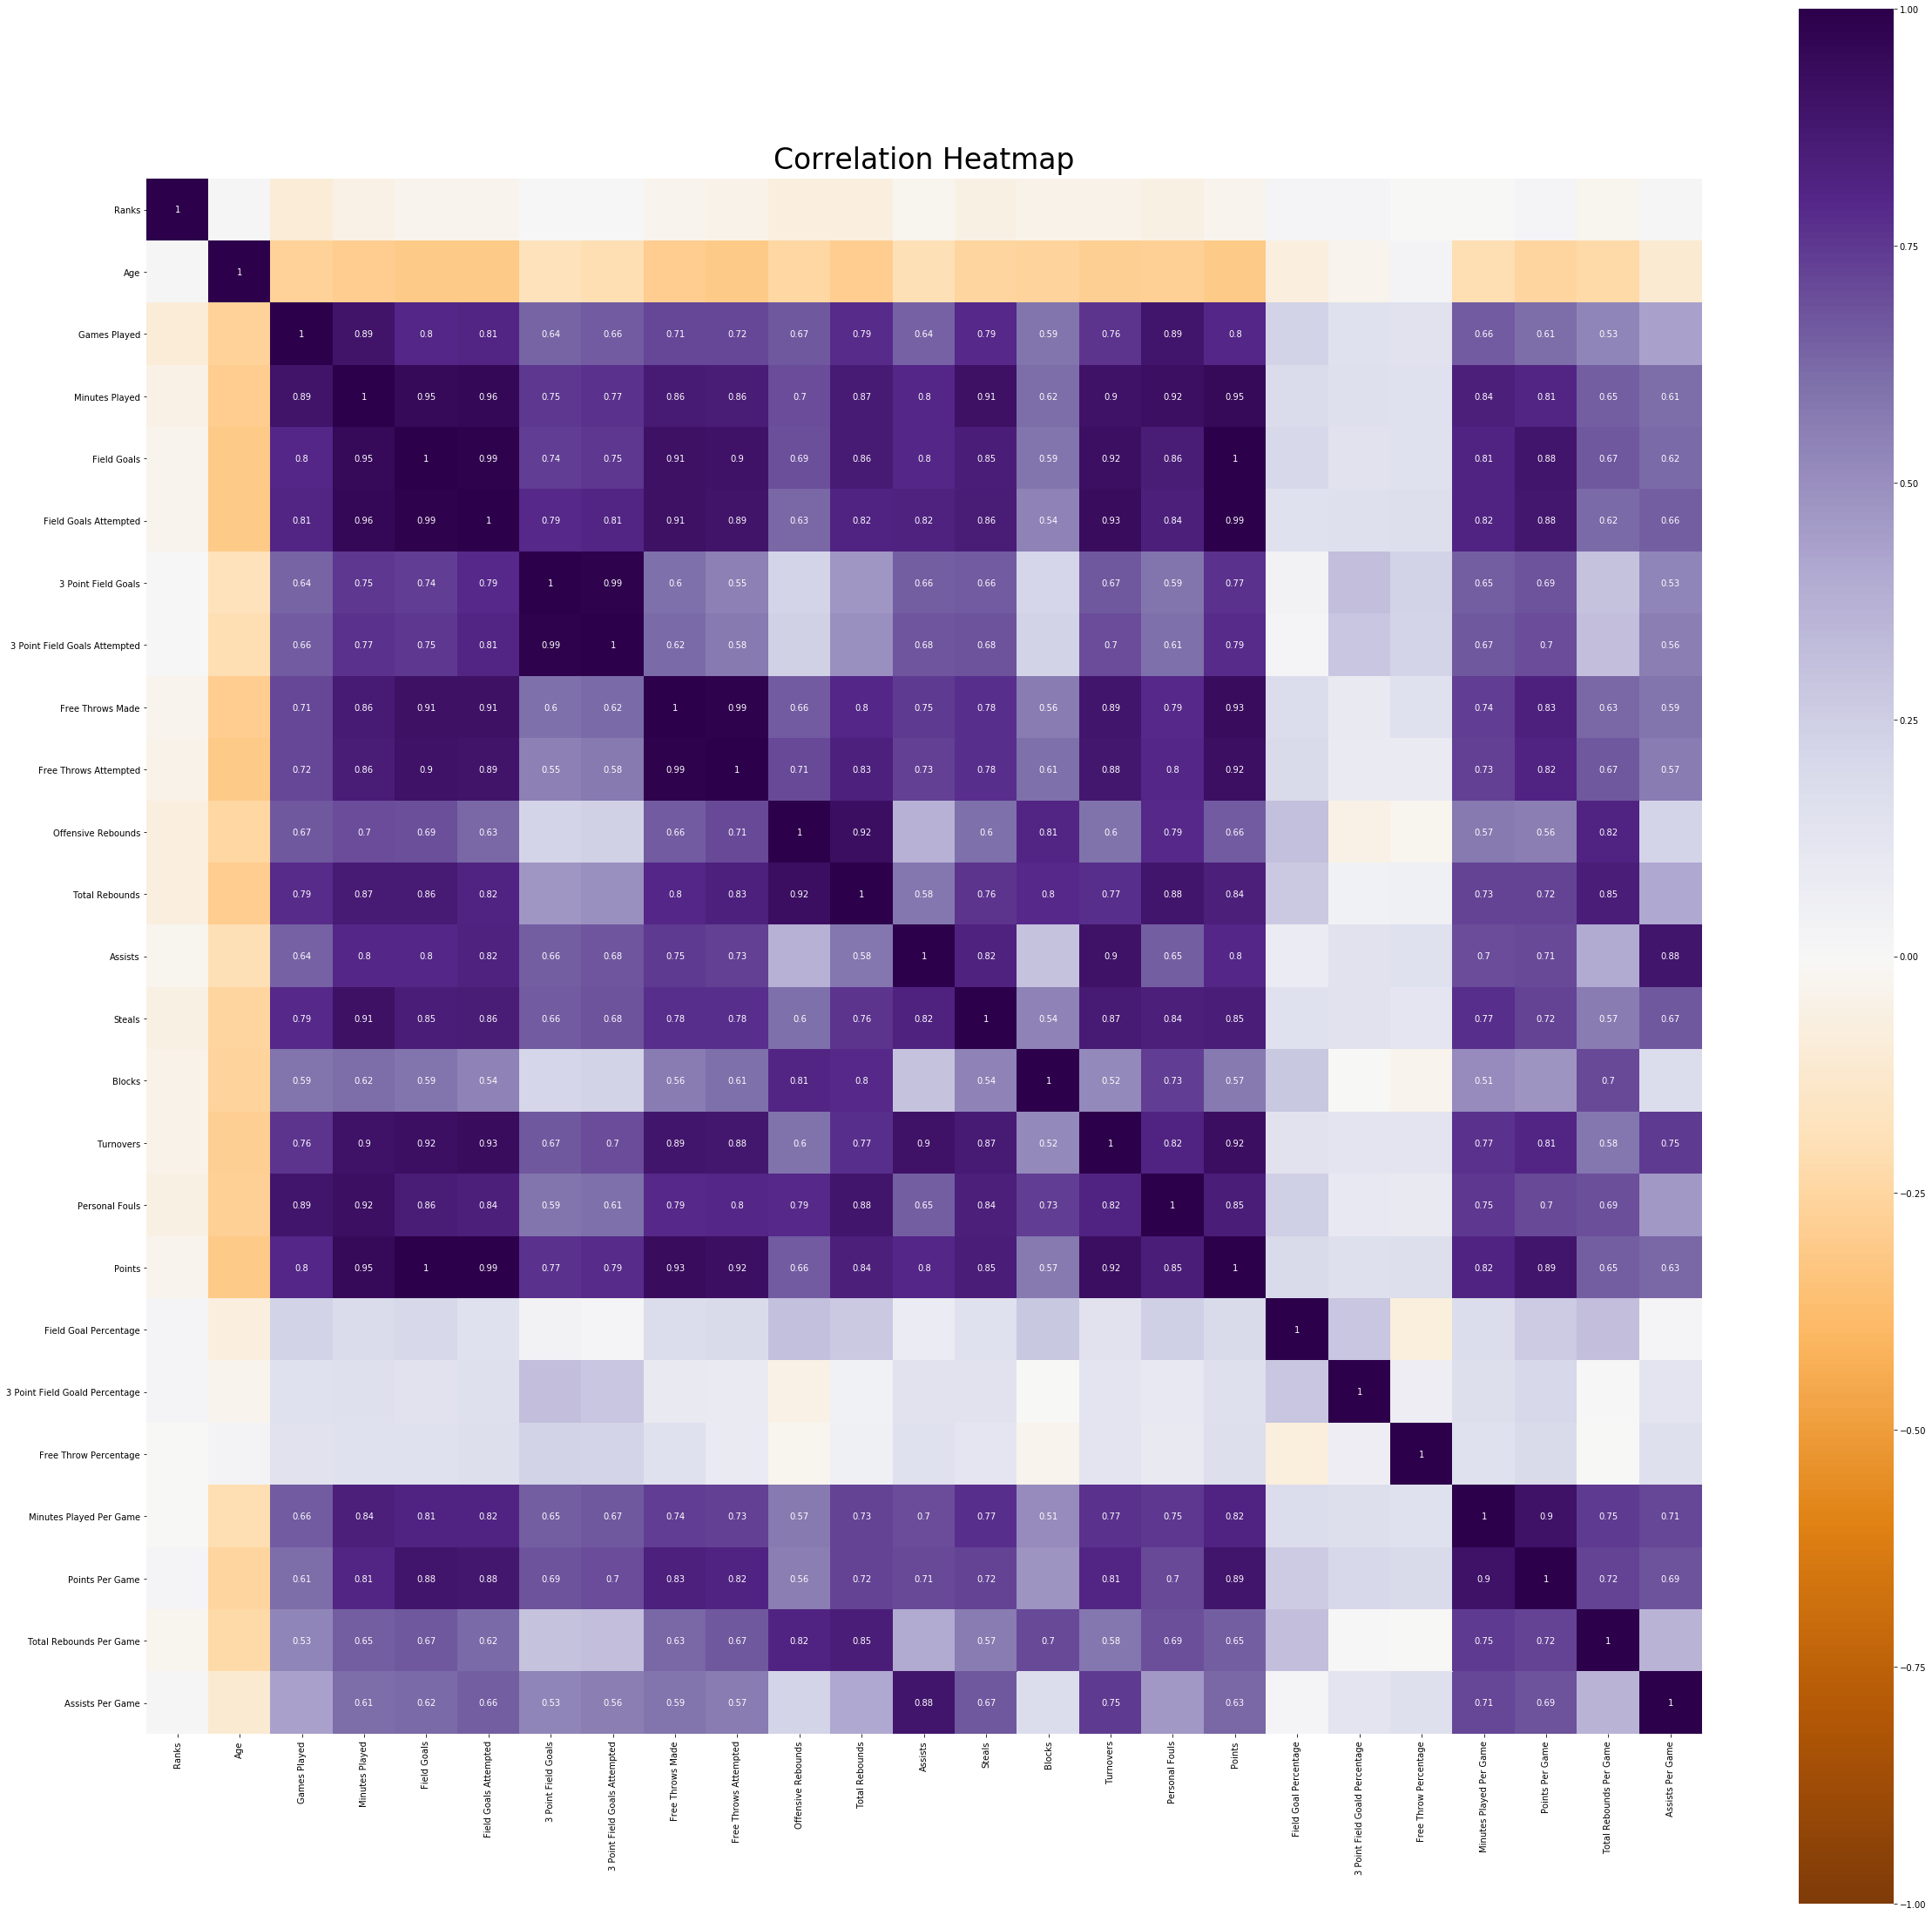

In [40]:
fig, ax = plt.subplots(figsize=(40, 40))
hmap = sns.heatmap(df2.corr(), vmin = -1, vmax=1, annot = True, square=True, cmap='PuOr');
for cell in ax.texts:
    if float(cell.get_text())>=0.5:
        cell.set_text(cell.get_text()) 
    else:
        cell.set_text("")
hmap.set_title('Correlation Heatmap', fontdict={'fontsize':33}, pad=12)
plt.show()

This heatmap is even more correlated than the previous one. However, one insight still stands: the number of attempts is correlated with success.

## Further Missing Value Imputation and Preprocessing:

### College Dataset:

In [41]:
df1 = df1.sort_values(by=['Recruit Rank'], ascending = False)

Before addressing the data, I chose to place the players in descending order based on their rank. This will provide some valuable insight as the rank is correlated with performance.

In [42]:
df1

,Player Name,Team,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,College Year,ht,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
16216,Harrison Barnes,North Carolina,ACC,38,72.9,108.2,26.0,48.7,52.80,6.9,11.0,7.2,14.0,141,195,0.723,180,384,0.469,49,137,0.358,1.1,2.0,37.4,So,8-Jun,3.736610,121.30100,2012,100.0,0.581082,7.0,94.6442,90.0760,3.667860,212.697000,5.53800,4.02998,1.508020,6.00117,29.2368,4.32657,1.67460,1.9474,3.2632,5.2105,1.1316,1.0789,0.3421,17.0526
13345,Harrison Barnes,North Carolina,ACC,37,73.2,106.8,24.7,49.0,52.17,7.2,12.8,9.6,14.6,93,124,0.750,143,302,0.474,67,195,0.344,1.4,1.4,24.9,Fr,8-Jun,3.480990,119.18900,2011,100.0,0.736112,7.0,96.5172,89.8594,3.766060,206.999000,6.45127,4.44300,2.008270,6.54853,29.3784,4.86756,1.68096,2.0270,3.8108,5.8378,1.4324,0.7297,0.4324,15.6757
26731,Andrew Wiggins,Kansas,B12,35,81.4,112.3,25.1,49.9,56.34,8.4,12.3,9.2,15.9,176,227,0.775,146,296,0.493,43,126,0.341,3.1,2.1,53.8,Fr,8-Jun,4.332290,126.01900,2014,100.0,0.675023,1.0,101.7120,94.4649,3.980010,206.932000,7.14569,4.66538,2.480310,6.97725,32.8000,5.14855,1.82870,2.1714,3.6857,5.8571,1.5429,1.1714,0.9714,17.0571
22038,Nerlens Noel,Kentucky,SEC,24,57.5,109.0,18.2,59.0,58.26,10.4,22.3,9.5,19.1,55,104,0.529,98,166,0.590,0,0,0.000,13.2,3.9,62.7,Fr,10-Jun,2.776340,109.13600,2013,100.0,0.844427,6.0,81.3956,78.8597,5.176410,227.307000,12.86080,2.47414,10.386600,11.08950,31.8750,3.95391,7.13561,2.7083,6.7500,9.4583,1.5833,2.0833,4.4167,10.4583
45534,Marvin Bagley III,Duke,ACC,33,74.8,123.8,25.8,64.0,64.35,13.8,21.4,8.8,14.7,131,209,0.627,247,382,0.647,23,58,0.397,2.6,1.4,47.5,Fr,11-Jun,6.059450,139.56900,2018,100.0,0.666696,2.0,96.4998,91.4700,4.415230,234.046000,8.66296,6.31140,2.351570,9.64470,33.7576,8.30044,1.34425,4.0000,7.0909,11.0909,1.5152,0.8182,0.8788,21.0303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61054,Abiram Frye,New Orleans,Slnd,1,0.2,0.0,0.0,0.0,0.00,0.0,55.6,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,2-Jun,-0.637841,-6.65217,2021,NaN,NaN,NaN,92.8882,96.9393,0.210396,0.559743,-14.89440,-9.44123,-5.453150,-5.59085,2.0000,-6.79195,1.20110,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
61055,Kamron Battle,Northern Illinois,MAC,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,5-Jun,-0.642761,-7.36104,2021,NaN,NaN,NaN,123.8580,122.5640,0.032564,0.379883,-7.51008,-4.02609,-3.483990,-21.12430,2.0000,-14.20320,-6.92110,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,Fr,11-Jun,-0.859158,19.23020,2021,NaN,0.000000,NaN,119.3690,124.7220,0.032976,1.432110,-11.36250,-7.44880,-3.913670,-12.23610,3.7500,-7.24223,-4.99382,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,Fr,NaN,-0.326039,-8.70362,2021,NaN,NaN,NaN,110.6320,108.0530,0.066633,0.098523,-4.93926,-4.48590,-0.453364,-4

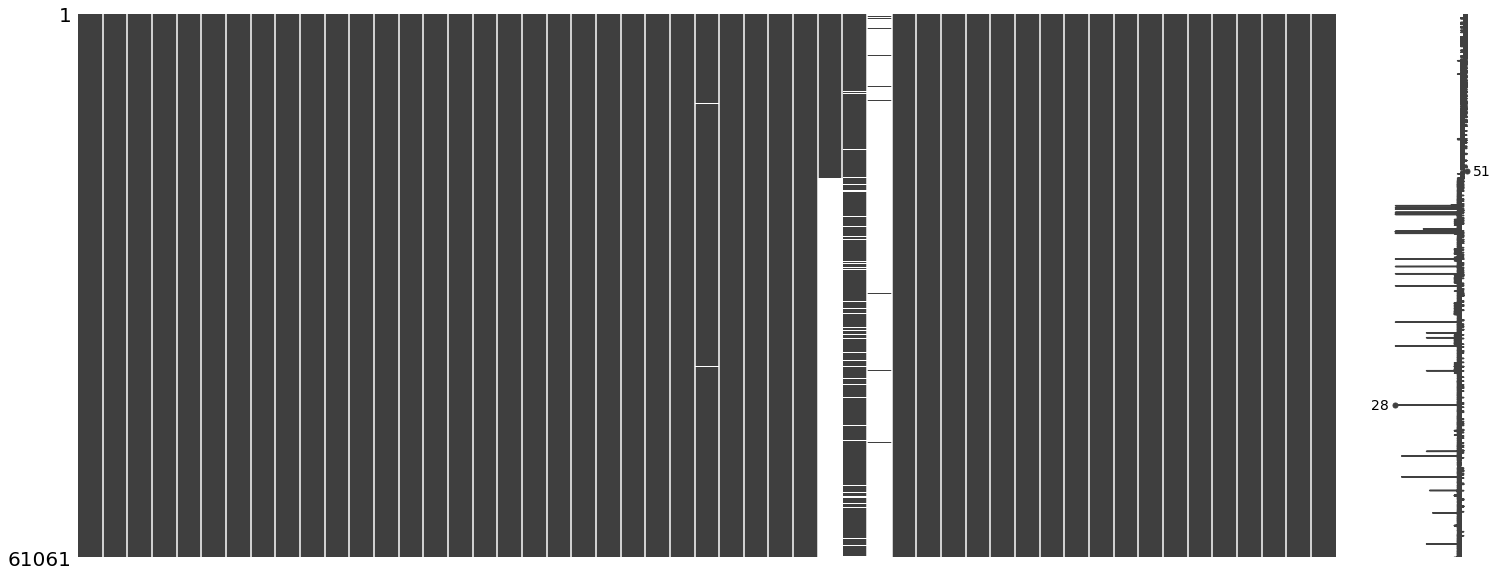

In [43]:
mno.matrix(df1)

In [44]:
df1['Draft Pick'] = df1['Draft Pick'].fillna(value = 59)
df1['Draft Pick']

16216     7.0
13345     7.0
26731     1.0
22038     6.0
45534     2.0
         ... 
61054    59.0
61055    59.0
61057    59.0
61058    59.0
61059    59.0
Name: Draft Pick, Length: 61061, dtype: float64

In [45]:
mins = df1.min(axis = 0)
mins

Player Name                                              A'Torey Everett
Team                                                   Abilene Christian
Conference                                                           A10
Games Played                                                           1
Minutes Played Per Game                                                0
Offensive Rating                                                       0
Usage Percentage                                                       0
Effective Field Gold Percentage                                        0
True Shot percentage                                                   0
Offensive Rebound Percentage                                           0
Defensive Rebound Percentage                                           0
Assist Percentage                                                      0
Turnover Percentage                                                    0
Free Throws made                                   

In [46]:
maxs = df1.max(axis = 0)
maxs

Player Name                                               Zyon Pullin
Team                                                   Youngstown St.
Conference                                                        ind
Games Played                                                       41
Minutes Played Per Game                                            98
Offensive Rating                                                  834
Usage Percentage                                                   50
Effective Field Gold Percentage                                   150
True Shot percentage                                              150
Offensive Rebound Percentage                                   1576.6
Defensive Rebound Percentage                                     1385
Assist Percentage                                                 100
Turnover Percentage                                               100
Free Throws made                                                  312
Free Throws Attempte

It can reasonably be inferred that the players that did not have draft pick value in their dataset were not drafted and thus are filled with a value of 61 as can be considered to have have been lower than the last pick (60 as indicated by our dataset)

In [47]:
df1['Recruit Rank'] = df1['Recruit Rank'].fillna(value = 61)

In [48]:
print(df1.isnull().sum(axis = 0))

Player Name                                               0
Team                                                      0
Conference                                                0
Games Played                                              0
Minutes Played Per Game                                   0
Offensive Rating                                          0
Usage Percentage                                          0
Effective Field Gold Percentage                           0
True Shot percentage                                      0
Offensive Rebound Percentage                              0
Defensive Rebound Percentage                              0
Assist Percentage                                         0
Turnover Percentage                                       0
Free Throws made                                          0
Free Throws Attempted                                     0
Free Throw Percentage                                     0
Two Point Shots Made                    

Something interesting we should notice is that there is the same number of missing values across many of the columns. This likely indicates some correlations between these two (which was confirmed with our earlier visualizations).

In [49]:
df1 = df1.drop('College Year', axis = 1)

As I mentioned in the EDA, the year is largely going to be unecessary after averaging performance over all years of play.

In [50]:
df1.columns

Index(['Player Name', 'Team', 'Conference', 'Games Played',
       'Minutes Played Per Game', 'Offensive Rating', 'Usage Percentage',
       'Effective Field Gold Percentage', 'True Shot percentage',
       'Offensive Rebound Percentage', 'Defensive Rebound Percentage',
       'Assist Percentage', 'Turnover Percentage', 'Free Throws made',
       'Free Throws Attempted', 'Free Throw Percentage',
       'Two Point Shots Made', 'Two Point Shots Attempted',
       'Two Shot Point Percentage', 'Three Points Made',
       'Three Points Attempted', 'Three Point Percentage', 'Block Percentage',
       'Steal Percentage', 'Free Throw Rate', 'ht',
       'Points Over Replacement Per Adjusted Game',
       'Adjusted Offensive Efficiency', 'Year', 'Recruit Rank',
       'Assist to Turnover Ratio', 'Draft Pick', 'Defensive Rating',
       'Adjusted Defensive Rating',
       'Defensive Points over replacement per adjusted game', 'stops',
       'Box Plus/Minus', 'Offensive Box Plus/Minus',
       '

In [51]:
df1.loc[df1['Defensive Rating'].isnull()]

,Player Name,Team,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,ht,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
4597,Scott Brittain,Boston University,AE,1,0.1,0.0,20.0,0.0,0.00,0.0,0.0,0.0,100.0,0,0,0.000,0,0,0.000,0,0,0.0,0.0,0.0,0.0,NaN,-0.293231,0.00000,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4986,Blake Thompson,Georgia Southern,SC,1,0.1,0.0,26.6,0.0,0.00,0.0,0.0,0.0,0.0,0,1,0.000,0,0,0.000,0,0,0.0,0.0,0.0,0.0,NaN,-0.300794,-2.17930,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5260,Stephen Duckett,Xavier,A10,1,0.1,63.8,25.7,0.0,0.00,57.3,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,1,0.0,0.0,0.0,0.0,NaN,-0.134001,65.19620,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5836,Jovonni Shuler,Savannah St.,ind,1,0.1,22.3,20.0,0.0,0.00,250.7,268.2,0.0,54.2,0,0,0.000,0,1,0.000,0,0,0.0,0.0,128.3,0.0,NaN,-0.109950,21.13320,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6020,Jeff Harris,Holy Cross,Pat,1,0.1,0.0,36.2,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.0,0.0,0.0,0.0,NaN,-0.327542,-9.88780,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6193,Ned Goertzen,Bradley,MVC,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.0,0.0,0.0,0.0,NaN,-0.318941,-7.40917,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6212,Ryan Martin,Maine,AE,2,0.2,0.0,20.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,2,0.000,0,1,0.0,0.0,0.0,0.0,NaN,-0.293231,0.00000,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8495,Chris Roberts,Arkansas,SEC,1,0.2,35.1,45.0,0.0,0.00,56.7,0.0,0.0,0.0,0,0,0.000,0,2,0.000,0,0,0.0,0.0,0.0,0.0,-,-0.403390,26.37940,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8498,Cody Lay,Arkansas,SEC,1,0.2,101.2,37.7,50.0,50.00,0.0,0.0,0.0,0.0,0,0,0.000,1,1,1.000,0,1,0.0,0.0,28.0,0.0,-,0.169005,108.85700,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,2.0
8888,Greg Whitaker,Drake,MVC,1,0.1,0.0,49.2,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,1,0.000,0,0,0.0,0.0,0.0,0.0,NaN,-0.417510,-35.81520,2010,61.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unsurprisingly, each of the above columns have missing values becaues of a common denominator (a zero value elsewhere in their performance). In other words, most of these players have missing values for various stats because either they did not have enough playtime or because they simply did did not demonstrate certain skills or plays (like a steal or block).

In [52]:
umns = ['Defensive Rating',
       'Adjusted Defensive Rating',
       'Defensive Points over replacement per adjusted game', 'stops',
       'Box Plus/Minus', 'Offensive Box Plus/Minus',
       'Defensive Box Plus/Minus', 'Game Box Plus/Minus', 'Minutes Played',
       'Offensive gbpm', 'Defensive gpbm', 'Offensive Rebounds',
       'Defensive Rebounds', 'Total Rebounds', 'Assists', 'Steals', 'Blocks',
       'Points']

In [53]:
for col in umns:
    df1[col] = df1[col].fillna(value = 0)

In [54]:
df1.isnull().sum(axis = 0)

Player Name                                               0
Team                                                      0
Conference                                                0
Games Played                                              0
Minutes Played Per Game                                   0
Offensive Rating                                          0
Usage Percentage                                          0
Effective Field Gold Percentage                           0
True Shot percentage                                      0
Offensive Rebound Percentage                              0
Defensive Rebound Percentage                              0
Assist Percentage                                         0
Turnover Percentage                                       0
Free Throws made                                          0
Free Throws Attempted                                     0
Free Throw Percentage                                     0
Two Point Shots Made                    

In [55]:
subby = df1.loc[df1['Assist to Turnover Ratio'].isnull()]

In [56]:
subby.describe()

,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
count,4727.000000,4727.000000,4727.000000,4727.00000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,0.0,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000,4727.000000
mean,4.638037,0.816713,67.180580,11.57802,23.565708,26.554815,5.477512,11.681891,6.597631,0.062619,0.388619,0.730484,0.134439,0.466258,1.222551,0.188368,0.251534,1.079966,0.084731,1.244066,1.441125,23.738545,-0.121963,58.684620,2015.248149,59.918172,NaN,58.995346,103.394168,104.576607,0.153715,1.574724,-6.423820,-3.200651,-3.223170,-5.001445,2.141866,-3.571125,-1.430320,0.095899,0.217153,0.313053,0.084537,0.050689,0.024430,0.461978
std,3.489349,1.116917,75.734214,10.37725,36.441607,35.923672,15.909161,22.895809,16.449538,2.050305,0.968299,1.585792,0.288712,1.237239,2.446113,0.338651,0.787106,2.284549,0.229869,9.773384,5.617648,61.198270,0.526775,70.064368,3.854526,7.525893,NaN,0.319985,19.385164,20.331818,0.172300,2.162518,12.951167,8.697578,8.269337,18.271909,1.910815,13.368343,7.598098,0.211078,0.367064,0.471984,0.205078,0.145458,0.104846,0.798125
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.267970,-35.914400,2009.000000,0.200000,NaN,37.000000,-304.883000,-328.528000,-0.189661,0.000000,-78.955000,-92.593500,-31.160400,-176.493000,0.000000,-104.966000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.374359,-6.697405,2012.000000,61.000000,NaN,59.000000,99.718400,99.876750,0.057115,0.334836,-12.145100,-7.040895,-6.616550,-12.409400,1.000000,-8.975840,-4.616615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.500000,53.400000,10.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.209547,45.208400,2015.000000,61.000000,NaN,59.000000,107.981000,108.009000,0.109302,0.896641,-5.879670,-3.424410,-3.265590,-6.171270,1.666700,-4.349950,-2.042220,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,115.250000,18.10000,49.100000,50.000000,4.250000,16.900000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.333000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.166123,108.639500,2019.000000,61.000000,NaN,59.000000,113.181000,114.642000,0.192774,1.957190,-1.322670,0.000000,-0.834421,0.628780,2.444400,0.312766,0.904240,0.125000,0.33

In [57]:
df1['Assist to Turnover Ratio'] = df1['Assist to Turnover Ratio'].fillna(value = 0)

Upon analyzing the distribution of the missing values in the "Assist to Turnover Ratio" column, it is clear that the null values have been caused by a divide by zero error. Considering how the majority of these players had a realtively low playtime and performance, it is reasonable to impute the missing values with 0.

In [58]:
df1.isnull().sum(axis = 0)

Player Name                                             0
Team                                                    0
Conference                                              0
Games Played                                            0
Minutes Played Per Game                                 0
Offensive Rating                                        0
Usage Percentage                                        0
Effective Field Gold Percentage                         0
True Shot percentage                                    0
Offensive Rebound Percentage                            0
Defensive Rebound Percentage                            0
Assist Percentage                                       0
Turnover Percentage                                     0
Free Throws made                                        0
Free Throws Attempted                                   0
Free Throw Percentage                                   0
Two Point Shots Made                                    0
Two Point Shot

In [59]:
df1 = df1.drop('ht', axis = 1)

*** I have been unable to find what information the 'ht' column provides so I chose to drop the value. Upon dropping, I did not see any measurable effect on the performance of the model.

#### In order to use the Linear Regression Model, I first have to deal with the categorical data by encoding them as numerical values (Label encoder from Sklearn).

In [60]:
le = LabelEncoder()
df1.Team = le.fit_transform(df1.Team)
df1

,Player Name,Team,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
16216,Harrison Barnes,204,ACC,38,72.9,108.2,26.0,48.7,52.80,6.9,11.0,7.2,14.0,141,195,0.723,180,384,0.469,49,137,0.358,1.1,2.0,37.4,3.736610,121.30100,2012,100.0,0.581082,7.0,94.6442,90.0760,3.667860,212.697000,5.53800,4.02998,1.508020,6.00117,29.2368,4.32657,1.67460,1.9474,3.2632,5.2105,1.1316,1.0789,0.3421,17.0526
13345,Harrison Barnes,204,ACC,37,73.2,106.8,24.7,49.0,52.17,7.2,12.8,9.6,14.6,93,124,0.750,143,302,0.474,67,195,0.344,1.4,1.4,24.9,3.480990,119.18900,2011,100.0,0.736112,7.0,96.5172,89.8594,3.766060,206.999000,6.45127,4.44300,2.008270,6.54853,29.3784,4.86756,1.68096,2.0270,3.8108,5.8378,1.4324,0.7297,0.4324,15.6757
26731,Andrew Wiggins,137,B12,35,81.4,112.3,25.1,49.9,56.34,8.4,12.3,9.2,15.9,176,227,0.775,146,296,0.493,43,126,0.341,3.1,2.1,53.8,4.332290,126.01900,2014,100.0,0.675023,1.0,101.7120,94.4649,3.980010,206.932000,7.14569,4.66538,2.480310,6.97725,32.8000,5.14855,1.82870,2.1714,3.6857,5.8571,1.5429,1.1714,0.9714,17.0571
22038,Nerlens Noel,141,SEC,24,57.5,109.0,18.2,59.0,58.26,10.4,22.3,9.5,19.1,55,104,0.529,98,166,0.590,0,0,0.000,13.2,3.9,62.7,2.776340,109.13600,2013,100.0,0.844427,6.0,81.3956,78.8597,5.176410,227.307000,12.86080,2.47414,10.386600,11.08950,31.8750,3.95391,7.13561,2.7083,6.7500,9.4583,1.5833,2.0833,4.4167,10.4583
45534,Marvin Bagley III,76,ACC,33,74.8,123.8,25.8,64.0,64.35,13.8,21.4,8.8,14.7,131,209,0.627,247,382,0.647,23,58,0.397,2.6,1.4,47.5,6.059450,139.56900,2018,100.0,0.666696,2.0,96.4998,91.4700,4.415230,234.046000,8.66296,6.31140,2.351570,9.64470,33.7576,8.30044,1.34425,4.0000,7.0909,11.0909,1.5152,0.8182,0.8788,21.0303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61054,Abiram Frye,199,Slnd,1,0.2,0.0,0.0,0.0,0.00,0.0,55.6,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.637841,-6.65217,2021,61.0,0.000000,59.0,92.8882,96.9393,0.210396,0.559743,-14.89440,-9.44123,-5.453150,-5.59085,2.0000,-6.79195,1.20110,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
61055,Kamron Battle,215,MAC,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.642761,-7.36104,2021,61.0,0.000000,59.0,123.8580,122.5640,0.032564,0.379883,-7.51008,-4.02609,-3.483990,-21.12430,2.0000,-14.20320,-6.92110,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
61057,Stavros Polatoglou,219,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,-0.859158,19.23020,2021,61.0,0.000000,59.0,119.3690,124.7220,0.032976,1.432110,-11.36250,-7.44880,-3.913670,-12.23610,3.7500,-7.24223,-4.99382,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000
61058,Sandy Ryan,307,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.326039,-8.70362,2021,61.0,0.000000,59.0,110.6320,108.0530,0.066633,0.098523,-4.93926,-4.48590,-0.453364,-4.65163,1.0000,-3.52482,-1.12681,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [61]:
le = LabelEncoder()
df1.Conference = le.fit_transform(df1.Conference)
df1

,Player Name,Team,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
16216,Harrison Barnes,204,1,38,72.9,108.2,26.0,48.7,52.80,6.9,11.0,7.2,14.0,141,195,0.723,180,384,0.469,49,137,0.358,1.1,2.0,37.4,3.736610,121.30100,2012,100.0,0.581082,7.0,94.6442,90.0760,3.667860,212.697000,5.53800,4.02998,1.508020,6.00117,29.2368,4.32657,1.67460,1.9474,3.2632,5.2105,1.1316,1.0789,0.3421,17.0526
13345,Harrison Barnes,204,1,37,73.2,106.8,24.7,49.0,52.17,7.2,12.8,9.6,14.6,93,124,0.750,143,302,0.474,67,195,0.344,1.4,1.4,24.9,3.480990,119.18900,2011,100.0,0.736112,7.0,96.5172,89.8594,3.766060,206.999000,6.45127,4.44300,2.008270,6.54853,29.3784,4.86756,1.68096,2.0270,3.8108,5.8378,1.4324,0.7297,0.4324,15.6757
26731,Andrew Wiggins,137,6,35,81.4,112.3,25.1,49.9,56.34,8.4,12.3,9.2,15.9,176,227,0.775,146,296,0.493,43,126,0.341,3.1,2.1,53.8,4.332290,126.01900,2014,100.0,0.675023,1.0,101.7120,94.4649,3.980010,206.932000,7.14569,4.66538,2.480310,6.97725,32.8000,5.14855,1.82870,2.1714,3.6857,5.8571,1.5429,1.1714,0.9714,17.0571
22038,Nerlens Noel,141,29,24,57.5,109.0,18.2,59.0,58.26,10.4,22.3,9.5,19.1,55,104,0.529,98,166,0.590,0,0,0.000,13.2,3.9,62.7,2.776340,109.13600,2013,100.0,0.844427,6.0,81.3956,78.8597,5.176410,227.307000,12.86080,2.47414,10.386600,11.08950,31.8750,3.95391,7.13561,2.7083,6.7500,9.4583,1.5833,2.0833,4.4167,10.4583
45534,Marvin Bagley III,76,1,33,74.8,123.8,25.8,64.0,64.35,13.8,21.4,8.8,14.7,131,209,0.627,247,382,0.647,23,58,0.397,2.6,1.4,47.5,6.059450,139.56900,2018,100.0,0.666696,2.0,96.4998,91.4700,4.415230,234.046000,8.66296,6.31140,2.351570,9.64470,33.7576,8.30044,1.34425,4.0000,7.0909,11.0909,1.5152,0.8182,0.8788,21.0303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61054,Abiram Frye,199,31,1,0.2,0.0,0.0,0.0,0.00,0.0,55.6,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.637841,-6.65217,2021,61.0,0.000000,59.0,92.8882,96.9393,0.210396,0.559743,-14.89440,-9.44123,-5.453150,-5.59085,2.0000,-6.79195,1.20110,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
61055,Kamron Battle,215,18,2,0.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.642761,-7.36104,2021,61.0,0.000000,59.0,123.8580,122.5640,0.032564,0.379883,-7.51008,-4.02609,-3.483990,-21.12430,2.0000,-14.20320,-6.92110,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
61057,Stavros Polatoglou,219,31,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,0,0,0.000,0,1,0.000,0,0,0.000,0.0,0.0,0.0,-0.859158,19.23020,2021,61.0,0.000000,59.0,119.3690,124.7220,0.032976,1.432110,-11.36250,-7.44880,-3.913670,-12.23610,3.7500,-7.24223,-4.99382,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000
61058,Sandy Ryan,307,4,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,-0.326039,-8.70362,2021,61.0,0.000000,59.0,110.6320,108.0530,0.066633,0.098523,-4.93926,-4.48590,-0.453364,-4.65163,1.0000,-3.52482,-1.12681,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In order to quantify whether or not the encoded data is useful, I chose to create a temporary dataframe(without the column string name as it is a string without the attribute .corr()) in order to determine how much each column was correlated with the team.

In [62]:
temp = df1.drop('Player Name', axis = 1)

In [63]:
for col in temp.columns:
    print(temp['Team'].corr(temp[col]))

0.9999999999999999
-0.04881228563773894
0.011725337363245008
0.009800771697135434
0.008711911372111166
0.0017248551030290297
0.007217518942298478
0.006047922454657286
0.002301123987437239
-0.0004042771288245327
0.0023113511547534792
-0.003464552139995491
0.012150712018013154
0.01261608660189483
-0.002002700934051877
0.013098755831864586
0.011931129109647977
0.006420938097817852
0.003843764377106894
0.0037457723893326894
-0.0005885081497381568
0.0017813880636837489
-0.002804715376162339
-0.00017971433422646246
0.023906053842106215
0.013858535524290422
0.0013497209678954515
-0.004618636239790042
0.01444397362781463
-0.00623545739397746
-0.019857340192143517
-0.04713435583366658
0.03900463984434347
0.013739390078627688
0.03072599470500083
0.02036195701701899
0.029882084500515726
0.02924400147117255
0.007264973167007653
0.020526679705000564
0.03510505249960276
0.00897470779680567
0.010490033506772124
0.010562459054293209
0.01025807334099906
-0.0022182475555388623
0.009812594599253434
0.007

Given this EXTREMELY small correlation between variables, I think that it is reasonable to drop the team column from the dataframe.

In [64]:
df1 = df1.drop('Team', axis = 1)

Another important aspect of the df1 is that much of the rows are repeated. For instance, a players freshman stats are reported alongside their senior stats. As aresult, we must average these values to provide a single row with average college performance. (It may also be important to just look at senior stats because it is the year when the players are at their peak physique and game knowledge).

In [65]:
df1 = df1.groupby('Player Name', as_index=False).mean()

In [66]:
df1

,Player Name,Conference,Games Played,Minutes Played Per Game,Offensive Rating,Usage Percentage,Effective Field Gold Percentage,True Shot percentage,Offensive Rebound Percentage,Defensive Rebound Percentage,Assist Percentage,Turnover Percentage,Free Throws made,Free Throws Attempted,Free Throw Percentage,Two Point Shots Made,Two Point Shots Attempted,Two Shot Point Percentage,Three Points Made,Three Points Attempted,Three Point Percentage,Block Percentage,Steal Percentage,Free Throw Rate,Points Over Replacement Per Adjusted Game,Adjusted Offensive Efficiency,Year,Recruit Rank,Assist to Turnover Ratio,Draft Pick,Defensive Rating,Adjusted Defensive Rating,Defensive Points over replacement per adjusted game,stops,Box Plus/Minus,Offensive Box Plus/Minus,Defensive Box Plus/Minus,Game Box Plus/Minus,Minutes Played,Offensive gbpm,Defensive gpbm,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Points
0,A'Torey Everett,23.000000,23.000000,19.000000,88.000000,15.700000,40.500000,50.080000,1.600000,8.100,14.500000,30.600000,18.000000,23.000000,0.783000,9.000000,30.00,0.300000,4.000000,7.000000,0.571000,0.600000,0.300000,62.200000,-0.209268,80.471900,2017.000000,61.0,0.894657,59.0,105.14600,105.770000,0.750191,30.380900,-6.406120,-4.928820,-1.477300,-6.515140,9.708300,-5.633160,-0.881980,0.125000,0.750000,0.875000,0.708300,0.083300,0.041700,2.416700
1,A'Torri Shine,30.000000,27.000000,79.300000,94.100000,23.100000,45.400000,49.985000,4.000000,10.100,8.200000,18.100000,71.500000,93.000000,0.759500,83.500000,186.00,0.448000,35.000000,113.500000,0.306000,0.650000,1.200000,31.750000,0.861839,94.332600,2014.500000,61.0,0.429983,59.0,116.45450,123.473000,0.553376,121.823500,-6.934815,-2.114325,-4.820495,-5.110925,31.867150,-0.919447,-4.191470,1.132150,2.699250,3.831400,0.950850,0.670500,0.215850,13.027450
2,A'Uston Calhoun,18.000000,30.000000,83.800000,99.900000,25.500000,47.100000,51.500000,7.800000,16.800,5.700000,15.500000,90.000000,113.000000,0.796000,155.000000,336.00,0.461000,19.000000,54.000000,0.352000,1.500000,0.700000,29.000000,2.562650,105.944000,2013.000000,61.0,0.369225,59.0,101.50300,102.012000,2.777940,157.168000,-3.123610,-1.285750,-1.837860,-1.065030,34.066700,0.949586,-2.014620,2.266700,4.766700,7.033300,0.800000,0.366700,0.466700,15.233300
3,A'uston Calhoun,18.000000,21.333333,45.333333,99.466667,24.633333,47.833333,50.153333,5.700000,11.300,3.533333,10.366667,46.333333,65.000000,0.643667,105.333333,220.00,0.319333,5.666667,23.666667,0.322333,1.633333,0.933333,39.966667,1.407146,107.432333,2011.000000,61.0,0.215826,59.0,105.64480,101.136000,1.697958,99.428000,-4.450073,-0.819087,-3.630987,6.487923,19.221100,9.365095,-2.877167,1.336367,2.485200,3.821600,0.402567,0.411300,0.368633,9.993633
4,A.C. Reid,12.500000,23.750000,39.950000,69.025000,16.700000,34.475000,35.722500,0.625000,9.725,11.900000,16.825000,9.000000,12.500000,0.541250,9.000000,22.75,0.285000,29.500000,100.000000,0.236750,0.950000,1.375000,8.375000,-0.862008,64.463275,2016.500000,61.0,1.213085,59.0,107.15375,107.458750,1.254415,73.391475,-6.006968,-4.232878,-1.774096,-6.546465,18.220425,-5.006785,-1.539672,0.094825,1.534850,1.629675,1.127825,0.447025,0.103825,4.362075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25714,Zvonko Buljan,21.000000,29.500000,68.100000,95.200000,27.600000,51.400000,54.550000,8.900000,28.850,17.950000,24.800000,64.500000,90.500000,0.713000,107.000000,199.00,0.537500,25.500000,83.500000,0.307500,1.150000,1.750000,32.050000,2.181990,107.172500,2009.500000,61.0,0.638469,59.0,99.11325,96.056600,2.906210,170.848500,2.191356,0.181834,2.009515,1.904985,28.017250,1.238993,0.665992,1.998300,6.192500,8.190800,1.986200,0.795400,0.272400,12.031650
25715,Zygis Sestokas,11.000000,23.000000,30.900000,132.700000,11.300000,58.800000,59.150000,2.700000,6.400,6.800000,6.700000,3.000000,

I have now completed the preprocessing for the first dataset and I will now move on to dealing with the second rookie dataset:

### Rookie Dataset:

In [67]:
df2.isnull().sum(axis = 0)

Ranks                               0
Player Name                         0
Debut Game                          0
Age                                 0
Games Played                        0
Minutes Played                      0
Field Goals                         0
Field Goals Attempted               0
3 Point Field Goals                 0
3 Point Field Goals Attempted       0
Free Throws Made                    0
Free Throws Attempted               0
Offensive Rebounds                  0
Total Rebounds                      0
Assists                             0
Steals                              0
Blocks                              0
Turnovers                           0
Personal Fouls                      0
Points                              0
Field Goal Percentage              19
3 Point Field Goald Percentage    164
Free Throw Percentage             140
Minutes Played Per Game             0
Points Per Game                     0
Total Rebounds Per Game             0
Assists Per 

In this dataset, all of the missing values are related to a percentage. This suggests that there might be some common issue that caused these values to be reported as missing. In order to investigate this, I chose to look at the column with the most missing values first (3 field goal percentage):

In [68]:
sub = df2.loc[df2['3 Point Field Goald Percentage'].isnull()]

In [69]:
sub.describe()

,Ranks,Age,Games Played,Minutes Played,Field Goals,Field Goals Attempted,3 Point Field Goals,3 Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Field Goal Percentage,3 Point Field Goald Percentage,Free Throw Percentage,Minutes Played Per Game,Points Per Game,Total Rebounds Per Game,Assists Per Game
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,145.000000,0.0,109.000000,164.000000,164.000000,164.000000,164.000000
mean,43.841463,22.768293,19.701220,246.152439,30.591463,59.384146,0.0,0.0,14.731707,23.774390,24.524390,64.798780,7.609756,6.341463,13.27439,12.597561,34.054878,75.914634,0.467662,NaN,0.591147,7.817073,2.245122,1.970122,0.235976
std,28.413455,2.004895,22.293134,419.633854,55.982339,108.016949,0.0,0.0,27.099023,42.319023,42.398844,113.376737,15.205953,13.744129,26.78094,23.022720,56.247945,137.483938,0.216912,NaN,0.225911,5.739590,2.093147,1.718366,0.274451
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,21.000000,2.000000,10.500000,1.000000,3.000000,0.0,0.0,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2.000000,0.368000,NaN,0.500000,3.775000,0.875000,0.800000,0.000000
50%,43.000000,23.000000,10.000000,56.000000,5.000000,13.000000,0.0,0.0,3.000000,4.500000,5.000000,13.000000,1.000000,1.000000,2.00000,3.000000,7.000000,14.000000,0.500000,NaN,0.597000,6.000000,1.950000,1.600000,0.200000
75%,63.000000,24.000000,32.000000,286.750000,36.000000,66.250000,0.0,0.0,15.000000,25.500000,24.250000,66.250000,7.000000,6.000000,11.50000,12.000000,38.500000,87.750000,0.571000,NaN,0.724000,10.500000,3.100000,2.625000,0.400000
max,120.000000,30.000000,82.000000,2311.000000,311.000000,653.000000,0.0,0.0,146.000000,230.000000,226.000000,611.000000,128.000000,133.000000,161.00000,146.000000,282.000000,744.000000,1.000000,NaN,1.000000,30.800000,10.200000,8.100000,1.700000


It is now clear taht the reason that the percentage was reported as NaN was because of a 0/0 error. In other words, these players did not make nor attempt any 3 point shots. Thus, we can impute the percentage values to be 0. 

In [70]:
df2['3 Point Field Goald Percentage'] = df2['3 Point Field Goald Percentage'].fillna(value = 0)

In [71]:
sub = df2.loc[df2['Field Goal Percentage'].isnull()]
sub.describe()

,Ranks,Age,Games Played,Minutes Played,Field Goals,Field Goals Attempted,3 Point Field Goals,3 Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Field Goal Percentage,3 Point Field Goald Percentage,Free Throw Percentage,Minutes Played Per Game,Points Per Game,Total Rebounds Per Game,Assists Per Game
count,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,0.0,19.0,1.0,19.000000,19.000000,19.000000,19.000000
mean,43.894737,23.000000,1.368421,3.052632,0.0,0.0,0.0,0.0,0.052632,0.105263,0.052632,0.526316,0.105263,0.210526,0.0,0.105263,0.473684,0.052632,NaN,0.0,0.5,2.184211,0.026316,0.384211,0.052632
std,24.492391,1.825742,0.597265,2.368161,0.0,0.0,0.0,0.0,0.229416,0.458831,0.229416,0.841191,0.315302,0.418854,0.0,0.315302,1.020263,0.229416,NaN,0.0,NaN,1.416280,0.114708,0.613970,0.157651
min,5.000000,21.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.0,0.5,0.000000,0.000000,0.000000,0.000000
25%,25.500000,21.000000,1.000000,1.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.0,0.5,1.000000,0.000000,0.000000,0.000000
50%,40.000000,23.000000,1.000000,2.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.0,0.5,2.000000,0.000000,0.000000,0.000000
75%,66.500000,24.000000,2.000000,3.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,NaN,0.0,0.5,3.000000,0.000000,0.750000,0.000000
max,78.000000,27.000000,3.000000,9.000000,0.0,0.0,0.0,0.0,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.0,1.000000,4.000000,1.000000,NaN,0.0,0.5,6.000000,0.500000,2.000000,0.500000


In [72]:
df2['Field Goal Percentage'] = df2['Field Goal Percentage'].fillna(value = 0)

In [73]:
sub = df2.loc[df2['Free Throw Percentage'].isnull()]
sub.describe()

,Ranks,Age,Games Played,Minutes Played,Field Goals,Field Goals Attempted,3 Point Field Goals,3 Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Field Goal Percentage,3 Point Field Goald Percentage,Free Throw Percentage,Minutes Played Per Game,Points Per Game,Total Rebounds Per Game,Assists Per Game
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,0.0,140.000000,140.000000,140.000000,140.000000
mean,46.142857,23.264286,4.121429,23.414286,2.414286,7.214286,0.900000,3.450000,0.0,0.0,0.835714,3.435714,1.400000,0.628571,0.250000,0.921429,2.142857,5.728571,0.296371,0.131829,NaN,5.437143,1.292143,0.852857,0.289286
std,30.614468,1.954926,4.214514,30.042413,3.396964,9.345322,2.295758,6.636855,0.0,0.0,1.267245,4.644500,2.368255,1.068468,0.700719,1.286722,2.983338,8.771966,0.280261,0.238916,NaN,4.588167,1.484164,0.924054,0.457974
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,19.750000,22.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.675000,0.000000,0.275000,0.000000
50%,42.500000,23.000000,3.000000,11.000000,1.000000,4.000000,0.000000,1.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.500000,1.000000,2.500000,0.250000,0.000000,NaN,4.000000,1.000000,0.700000,0.000000
75%,68.500000,24.000000,5.000000,31.250000,3.000000,10.000000,1.000000,4.000000,0.0,0.0,1.000000,4.000000,2.000000,1.000000,0.000000,1.000000,3.000000,6.250000,0.500000,0.200000,NaN,6.500000,2.000000,1.000000,0.500000
max,123.000000,29.000000,26.000000,167.000000,23.000000,50.000000,19.000000,44.000000,0.0,0.0,8.000000,29.000000,11.000000,6.000000,5.000000,6.000000,17.000000,65.000000,1.000000,1.000000,NaN,24.000000,8.400000,5.000000,2.800000


In [74]:
df2['Free Throw Percentage'] = df2['Free Throw Percentage'].fillna(value = 0)

The field goal and free throw percentages were NaN values were also caused by a 0/0 error caused by no succesful shots and no attempts. Thus, I was able to impute the missing values with a 0 value.

In [75]:
df2.isnull().sum(axis = 0)

Ranks                             0
Player Name                       0
Debut Game                        0
Age                               0
Games Played                      0
Minutes Played                    0
Field Goals                       0
Field Goals Attempted             0
3 Point Field Goals               0
3 Point Field Goals Attempted     0
Free Throws Made                  0
Free Throws Attempted             0
Offensive Rebounds                0
Total Rebounds                    0
Assists                           0
Steals                            0
Blocks                            0
Turnovers                         0
Personal Fouls                    0
Points                            0
Field Goal Percentage             0
3 Point Field Goald Percentage    0
Free Throw Percentage             0
Minutes Played Per Game           0
Points Per Game                   0
Total Rebounds Per Game           0
Assists Per Game                  0
dtype: int64

In [76]:
df2.columns

Index(['Ranks', 'Player Name', 'Debut Game', 'Age', 'Games Played',
       'Minutes Played', 'Field Goals', 'Field Goals Attempted',
       '3 Point Field Goals', '3 Point Field Goals Attempted',
       'Free Throws Made', 'Free Throws Attempted', 'Offensive Rebounds',
       'Total Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers',
       'Personal Fouls', 'Points', 'Field Goal Percentage',
       '3 Point Field Goald Percentage', 'Free Throw Percentage',
       'Minutes Played Per Game', 'Points Per Game', 'Total Rebounds Per Game',
       'Assists Per Game'],
      dtype='object')

In [77]:
df2 = df2.drop('Debut Game', axis = 1)

I also chose to drop the "Debut Game" column because it does not have a signficiant impact on performance. The date of the match logically ought to not be signfiicant.

In [78]:
df2

,Ranks,Player Name,Age,Games Played,Minutes Played,Field Goals,Field Goals Attempted,3 Point Field Goals,3 Point Field Goals Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Field Goal Percentage,3 Point Field Goald Percentage,Free Throw Percentage,Minutes Played Per Game,Points Per Game,Total Rebounds Per Game,Assists Per Game
0,1,David Andersen,29,63,891,147,340,27,78,46,67,54,208,44,15,12,37,119,367,0.432,0.346,0.687,14.1,5.8,3.3,0.7
1,2,Antonio Anderson,24,1,15,1,3,0,0,0,0,1,1,0,0,0,1,1,2,0.333,0.000,0.000,15.0,2.0,1.0,0.0
2,3,Jeff Ayres,22,39,405,43,65,0,0,18,20,25,98,1,7,16,12,76,104,0.662,0.000,0.900,10.4,2.7,2.5,0.0
3,4,Rodrigue Beaubois,21,56,700,155,299,45,110,42,52,12,78,74,29,12,54,84,397,0.518,0.409,0.808,12.5,7.1,1.4,1.3
4,5,DeJuan Blair,20,82,1494,275,495,0,2,88,161,200,526,65,50,39,112,224,638,0.556,0.000,0.547,18.2,7.8,6.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,122,Ziaire Williams,20,62,1346,191,424,76,242,43,55,26,129,65,35,12,41,113,501,0.450,0.314,0.782,21.7,8.1,2.1,1.0
1164,123,McKinley Wright IV,23,5,19,2,3,1,2,0,0,0,0,3,0,0,1,1,5,0.667,0.500,0.000,3.8,1.0,0.0,0.6
1165,124,Moses Wright,23,4,14,1,4,0,1,3,3,1,3,2,0,1,0,0,5,0.250,0.000,1.000,3.5,1.3,0.8,0.5
1166,125,Gabe York,28,2,21,2,7,1,6,3,5,0,2,4,2,1,1,4,8,0.286,0.167,0.600,10.5,4.0,1.0,2.0


Before we can move onto our model, we have to do one final "averaging" of repeated names (like we did for the first dataset).

In [79]:
df2 = df2.groupby('Player Name', as_index=False).mean()

## Modeling /Data Selection

An important facet of this project is that our datasets do not compeltely overlap. Not every single college player had the opportunity to enter the NBA and many went undrafted. As a result, for our Linear Regression model, we will have to select only the data that overlaps to model our model.

In [80]:
names1 = df1['Player Name'].unique()

In [81]:
names2 = df2['Player Name'].unique()

In [82]:
commonNames = set(names1).intersection(names2)
commonNames

{'A.J. Hammons',
 'A.J. Price',
 'Aaron Gordon',
 'Aaron Harrison',
 'Aaron Henry',
 'Aaron Holiday',
 'Aaron Jackson',
 'Aaron Nesmith',
 'Aaron Wiggins',
 'Abdel Nader',
 'Ade Murkey',
 'Admiral Schofield',
 'Adonis Thomas',
 'Adreian Payne',
 'Ahmad Caver',
 'Al-Farouq Aminu',
 'Alan Williams',
 'Alec Burks',
 'Alec Peters',
 'Aleem Ford',
 'Alex Caruso',
 'Alex Kirk',
 'Alex Len',
 'Alex Poythress',
 'Alex Stepheson',
 'Alfonzo McKinnie',
 'Alize Johnson',
 'Allen Crabbe',
 'Allonzo Trier',
 'Alonzo Gee',
 'Amida Brimah',
 'Amile Jefferson',
 'Amir Coffey',
 'Andre Dawkins',
 'Andre Drummond',
 'Andre Ingram',
 'Andre Roberson',
 'Andrew Goudelock',
 'Andrew Harrison',
 'Andrew Nicholson',
 'Andrew Wiggins',
 'Andy Rautins',
 'Anthony Bennett',
 'Anthony Brown',
 'Anthony Davis',
 'Anthony Edwards',
 'Anthony Gill',
 'Anthony Lamb',
 'Antonio Anderson',
 'Antonio Blakeney',
 'Antonius Cleveland',
 'Archie Goodwin',
 'Arinze Onuaku',
 'Armon Johnson',
 'Armoni Brooks',
 'Arnett Moul

In [83]:
def change(set):
    return list(set)
CommonNames = change(commonNames)

In [84]:
j = 0
for i in CommonNames:
    j = j+1
print('There are {} names in common between the two datasets'.format(j))

There are 936 names in common between the two datasets


Now that we have a list of all of the Common Names, we can create 4 dataframes (CommonNames in df1 and df2/ UncommonNames in df1 and df2).

In [85]:
collegePerformanceIn = df1[df1['Player Name'].isin(CommonNames)]

In [86]:
rookiePerformanceIn = df2[df2['Player Name'].isin(CommonNames)]

In [87]:
collegePerformanceOut = df1[~df1['Player Name'].isin(CommonNames)]

In [88]:
rookiePerformanceOut = df2[~df2['Player Name'].isin(CommonNames)]

After splitting this data based on their inclusion in both datasets, we can finally encode the names for our model.

In [89]:
le = LabelEncoder()
collegePerformanceIn['Player Name'] = le.fit_transform(collegePerformanceIn['Player Name'])
rookiePerformanceIn['Player Name'] = le.fit_transform(rookiePerformanceIn['Player Name'])
collegePerformanceOut['Player Name'] = le.fit_transform(collegePerformanceOut['Player Name'])
rookiePerformanceOut['Player Name'] = le.fit_transform(rookiePerformanceOut['Player Name'])

/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

### Test/Train Split and Modeling

In [90]:
X = collegePerformanceIn
Y = rookiePerformanceIn

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [92]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [93]:
linR = LinearRegression()
linR.fit(X_trainScaled,Y_train)
Y_pred = linR.predict(X_trainScaled)
r2 = linR.score(X_trainScaled,Y_train)
print(r2)

0.5276291256543986


/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [94]:
linR = LinearRegression()
cv = cross_val_score(linR,X_trainScaled,Y_train,cv=5)
print(cv.mean())

0.42198028294761303


/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/vishva/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multio

## Conclusions/Insight

At the end of this project, it is clear that data CAN indeed provide some insight into the future success of players in the NBA. However, the coefficient of determination score (R2) is still relatively low. This is where the expertise of scouters likely comes in. As such, this project reveals how both on-site experience coupled with data can provide scouts and coaches with sufficient information to make informed draft picks. Ultimately, I think that this project was an interesting look into how data is involved in sports. For the future, I would like to work on exporting this model into a web app of sorts to predict the performance of other players (whether they get drafted into the NBA or not). In other words, I hope to provide some predictive power to the players that may not have had the same number of opportunities to share the court as their peers.

## Thank you for reading through this notebook! 